In [1]:
import numpy as np
from numpy.random import seed
import pandas as pd
import random as rn
import os

seed_num = 1
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(seed_num)
rn.seed(seed_num)

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.compat.v1.keras import backend as K

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
tf.random.set_seed(seed_num)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
print(tf.config.list_physical_devices('GPU'))
print(tf. __version__) 


[]
2.8.0


2022-06-08 13:12:43.942225: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import scikeras


In [3]:
import os
cwd = os.getcwd()
print(cwd)

/home/ryley/WDK/ML


In [4]:
df = pd.read_csv('dataset/dataframes/komegasst.csv')
#df = df[df["Case"].str.contains("DUCT")==False]
df.reset_index(drop=True,inplace=True)

prefix_list = ['PHLL','BUMP','DUCT','CNDV','CBFS']

rescaling_dict =	{
  "1": ['komegasst_Tensors_1_11', 
          'komegasst_Tensors_1_12',
          'komegasst_Tensors_1_13',
          'komegasst_Tensors_1_22',
          'komegasst_Tensors_1_23',
          'komegasst_Tensors_1_33'],
  "2": ['komegasst_Tensors_2_11', 
          'komegasst_Tensors_2_12',
          'komegasst_Tensors_2_13',
          'komegasst_Tensors_2_22',
          'komegasst_Tensors_2_23',
          'komegasst_Tensors_2_33',
       'komegasst_Tensors_3_11', 
          'komegasst_Tensors_3_12',
          'komegasst_Tensors_3_13',
          'komegasst_Tensors_3_22',
          'komegasst_Tensors_3_23',
          'komegasst_Tensors_3_33',
       'komegasst_Tensors_4_11', 
          'komegasst_Tensors_4_12',
          'komegasst_Tensors_4_13',
          'komegasst_Tensors_4_22',
          'komegasst_Tensors_4_23',
          'komegasst_Tensors_4_33'],
  "3": ['komegasst_Tensors_5_11', 
          'komegasst_Tensors_5_12',
          'komegasst_Tensors_5_13',
          'komegasst_Tensors_5_22',
          'komegasst_Tensors_5_23',
          'komegasst_Tensors_5_33',
        'komegasst_Tensors_6_11', 
          'komegasst_Tensors_6_12',
          'komegasst_Tensors_6_13',
          'komegasst_Tensors_6_22',
          'komegasst_Tensors_6_23',
          'komegasst_Tensors_6_33'],
  "4": ['komegasst_Tensors_7_11', 
          'komegasst_Tensors_7_12',
          'komegasst_Tensors_7_13',
          'komegasst_Tensors_7_22',
          'komegasst_Tensors_7_23',
          'komegasst_Tensors_7_33',
       'komegasst_Tensors_8_11', 
          'komegasst_Tensors_8_12',
          'komegasst_Tensors_8_13',
          'komegasst_Tensors_8_22',
          'komegasst_Tensors_8_23',
          'komegasst_Tensors_8_33',
       'komegasst_Tensors_9_11', 
          'komegasst_Tensors_9_12',
          'komegasst_Tensors_9_13',
          'komegasst_Tensors_9_22',
          'komegasst_Tensors_9_23',
          'komegasst_Tensors_9_33'],
    
  "5": ['komegasst_Tensors_10_11', 
          'komegasst_Tensors_10_12',
          'komegasst_Tensors_10_13',
          'komegasst_Tensors_10_22',
          'komegasst_Tensors_10_23',
          'komegasst_Tensors_10_33'],
}

df.loc[:,'komegasst_T_k'] = df.loc[:,'komegasst_T_k'] * 6

df.loc[:,rescaling_dict["1"]] = df.loc[:,rescaling_dict["1"]].divide(df.loc[:, 'komegasst_T_t']**1, axis="index")
df.loc[:,rescaling_dict["2"]] = df.loc[:,rescaling_dict["2"]].divide(df.loc[:, 'komegasst_T_t']**2, axis="index")
df.loc[:,rescaling_dict["3"]] = df.loc[:,rescaling_dict["3"]].divide(df.loc[:, 'komegasst_T_t']**3, axis="index")
df.loc[:,rescaling_dict["4"]] = df.loc[:,rescaling_dict["4"]].divide(df.loc[:, 'komegasst_T_t']**4, axis="index")
df.loc[:,rescaling_dict["5"]] = df.loc[:,rescaling_dict["5"]].divide(df.loc[:, 'komegasst_T_t']**5, axis="index")

df.loc[:,rescaling_dict["1"]] = df.loc[:,rescaling_dict["1"]].multiply((df[['komegasst_T_k', 'komegasst_T_t']].max(axis=1))**1, axis="index")
df.loc[:,rescaling_dict["2"]] = df.loc[:,rescaling_dict["2"]].multiply((df[['komegasst_T_k', 'komegasst_T_t']].max(axis=1))**2, axis="index")
df.loc[:,rescaling_dict["3"]] = df.loc[:,rescaling_dict["3"]].multiply((df[['komegasst_T_k', 'komegasst_T_t']].max(axis=1))**3, axis="index")
df.loc[:,rescaling_dict["4"]] = df.loc[:,rescaling_dict["4"]].multiply((df[['komegasst_T_k', 'komegasst_T_t']].max(axis=1))**4, axis="index")
df.loc[:,rescaling_dict["5"]] = df.loc[:,rescaling_dict["5"]].multiply((df[['komegasst_T_k', 'komegasst_T_t']].max(axis=1))**5, axis="index")

df.describe()

Unnamed: 0   komegasst_Cx   komegasst_Cy   komegasst_Cz  \
count  895640.000000  895640.000000  895640.000000  895640.000000   
mean    40478.489758       3.946571       0.684325       0.113767   
std     41498.600104       5.600255       1.348276       0.198281   
min         0.000000      -7.264670      -0.498505      -0.498505   
25%      7721.000000       0.273305       0.019601       0.025000   
50%     28326.000000       1.250000       0.096835       0.050000   
75%     59061.000000       6.606607       1.016360       0.250000   
max    183711.000000      25.305400       9.479090       0.505000   

        komegasst_Ux   komegasst_Uy  komegasst_Uz    komegasst_p  \
count  895640.000000  895640.000000  8.956400e+05  895640.000000   
mean        5.073959       0.004683 -2.515730e-11      -9.162379   
std         7.149247       0.816110  7.434139e-09      22.881880   
min        -3.482100      -2.270400 -1.369770e-07    -138.762000   
25%         0.267703      -0.050952 -2.966375e-22      -5.118880   
50%         0.864518      -0.000017  0.000000e+00      -0.000119   
75%        11.583500       0.000693  1.071137e-22       0.001604   
max        22.094900       5.631480  1.077340e-07      50.102300   

       komegasst_omega  komegasst_epsilon  ...  labels_tau_33      labels_um  \
count     8.956400e+05       8.956400e+05  ...  895640.000000  895640.000000   
mean      1.403214e+04       1.711907e+02  ...       0.402464       5.608039   
std       2.171873e+05       6.254013e+02  ...       0.906041       7.318170   
min       1.731410e-02       6.277550e-11  ...       0.000000      -1.877020   
25%       2.257000e+00       4.935410e-04  ...       0.000114       0.416454   
50%       2.197740e+01       6.121280e-03  ...       0.002146       0.955644   
75%       5.233732e+02       3.050190e+01  ...       0.338569      12.607413   
max       6.692820e+06       1.689130e+04  ...       6.920628      22.991733   

           labels_vm      labels_wm      labels_uu      labels_uv  \
count  895640.000000  895640.000000  895640.000000  895640.000000   
mean       -0.094093      -0.000001       0.705201      -0.204549   
std         0.978417       0.001320       1.582177       0.540844   
min        -4.018943      -0.017167       0.000000      -4.367508   
25%        -0.092677       0.000000       0.001802      -0.124215   
50%        -0.000999       0.000000       0.007715      -0.000293   
75%         0.001438       0.000000       0.585165       0.000005   
max         5.944644       0.015958      12.904184       1.516789   

          labels_uw     labels_vv     labels_vw      labels_ww  
count  8.956400e+05  8.956400e+05  8.956400e+05  895640.000000  
mean  -1.359287e-06  2.871643e-01 -6.072674e-09       0.402464  
std    1.182863e-04  7.087897e-01  1.379124e-05       0.906041  
min   -9.489061e-04  3.161123e-14 -2.127504e-04       0.000000  
25%   -3.544694e-07  1.920675e-04  0.000000e+00       0.000114  
50%    0.000000e+00  1.500282e-03  0.000000e+00       0.002146  
75%    0.000000e+00  1.991498e-01  2.449383e-08       0.338569  
max    1.053177e-03  6.061361e+00  3.113538e-04       6.920628  

[8 rows x 283 columns]

# Calculate optimal $g^{(n)}$ coefficients

The core optimization here is a multiple objective least squares:
Minimize $||Rx-s||^2 + \lambda ||x||^2$, subject to the constraints $Gx \leq h$

- Realizability constraint: $-1/3 \leq b_{ii} \leq 2/3$ (diagonal) $-1/2 \leq b{ij} \leq 1/2$ (off-diagonal)
    - Inequality constraints are of the form $Gx \leq h$
    - Constraints of the form $z < ax $ have to be flipped to $-z > -ax$
- Negativity constraint on $g^{(1)}$

In [5]:
from qpsolvers import solve_ls


def R_G_h_twoD(T1_11,T1_12,T1_22,
                    T2_11,T2_12,T2_22,
                    T3_11,T3_12,T3_22):
    
    R = np.array([[T1_11, T2_11, T3_11],
                  [T1_12, T2_12, T3_12],
                  [T1_22, T2_22, T3_22]
                 ])
    
    h = np.array([-(-1/3),
                  2/3,
                  -(-1/2),
                  1/2,
                  -(-1/3),
                  2/3,
                ])

    G = np.array([[-T1_11,-T2_11,-T3_11],
                  [ T1_11, T2_11, T3_11],
                  [-T1_12,-T2_12,-T3_12],
                  [ T1_12, T2_12, T3_12],
                  [-T1_22,-T2_22,-T3_22],
                  [ T1_22, T2_22, T3_22],
                 ])
    
    ub = np.array([0,np.Inf,np.Inf])

    return R, G, h.reshape((6,)), ub

def R_G_h_threeD(T1_11, T1_12, T1_13, T1_22, T1_23,
                        T2_11, T2_12, T2_13, T2_22, T2_23,
                        T3_11, T3_12, T3_13, T3_22, T3_23):
    
    R = np.array([[T1_11, T2_11, T3_11],
                  [T1_12, T2_12, T3_12],
                  [T1_13, T2_13, T3_13],
                  [T1_22, T2_22, T3_22],
                  [T1_23, T2_23, T3_23]
                 ])
    
    h = np.array([-(-1/3),
                  2/3,
                  -(-1/2),
                  1/2,
                  -(-1/2),
                  1/2,
                  -(-1/3),
                  2/3,
                  -(-1/2),
                  1/2,
                ])

    G = np.array([[-T1_11,-T2_11,-T3_11],
                  [ T1_11, T2_11, T3_11],
                  [-T1_12,-T2_12,-T3_12],
                  [ T1_12, T2_12, T3_12],
                  [-T1_13,-T2_13,-T3_13],
                  [ T1_13, T2_13, T3_13],
                  [-T1_22,-T2_22,-T3_22],
                  [ T1_22, T2_22, T3_22],
                  [-T1_23,-T2_23,-T3_23],
                  [ T1_23, T2_23, T3_23],
                 ])
    
    ub = np.array([0,np.Inf,np.Inf])

    return R, G, h.reshape((10,)), ub


def calc_optimal_g_mols(df, lda):
    
    N = 3
    
    T1_11_all = df['komegasst_Tensors_1_11']
    T1_12_all = df['komegasst_Tensors_1_12']
    T1_13_all = df['komegasst_Tensors_1_13']
    T1_22_all = df['komegasst_Tensors_1_22']
    T1_23_all = df['komegasst_Tensors_1_23']

    T2_11_all = df['komegasst_Tensors_2_11']
    T2_12_all = df['komegasst_Tensors_2_12']
    T2_13_all = df['komegasst_Tensors_2_13']
    T2_22_all = df['komegasst_Tensors_2_22']
    T2_23_all = df['komegasst_Tensors_2_23']

    T3_11_all = df['komegasst_Tensors_3_11']
    T3_12_all = df['komegasst_Tensors_3_12']
    T3_13_all = df['komegasst_Tensors_3_13']
    T3_22_all = df['komegasst_Tensors_3_22']
    T3_23_all = df['komegasst_Tensors_3_23']

    b_11_all = df['labels_b_11']
    b_12_all = df['labels_b_12']
    b_13_all = df['labels_b_13']
    b_22_all = df['labels_b_22']
    b_23_all = df['labels_b_23']


    g_opt_all = np.empty((len(T1_11_all),N))   
    b_11_est = np.empty(len(T1_11_all))
    b_12_est = np.empty(len(T1_11_all))
    b_13_est = np.empty(len(T1_11_all))
    b_22_est = np.empty(len(T1_11_all))
    b_23_est = np.empty(len(T1_11_all))


    for i in range(len(T1_11_all)):
        T1_11 = T1_11_all[i]
        T1_12 = T1_12_all[i]
        T1_13 = T1_13_all[i]
        T1_22 = T1_22_all[i]
        T1_23 = T1_23_all[i]

        T2_11 = T2_11_all[i]
        T2_12 = T2_12_all[i]
        T2_13 = T2_13_all[i]
        T2_22 = T2_22_all[i]
        T2_23 = T2_23_all[i]

        T3_11 = T3_11_all[i]
        T3_12 = T3_12_all[i]
        T3_13 = T3_13_all[i]
        T3_22 = T3_22_all[i]
        T3_23 = T3_23_all[i]

        b_11 = b_11_all[i]
        b_12 = b_12_all[i]
        b_13 = b_13_all[i]
        b_22 = b_22_all[i]
        b_23 = b_23_all[i]
       
        if 'DUCT' in df["Case"].iloc[i]:
            R, G, h, ub = R_G_h_threeD(
                        T1_11, T1_12, T1_13, T1_22, T1_23,
                        T2_11, T2_12, T2_13, T2_22, T2_23,
                        T3_11, T3_12, T3_13, T3_22, T3_23)
            
            b = np.array([b_11,
                          b_12,
                          b_13,
                          b_22,
                          b_23
                         ]).transpose()
        else: 
            R, G, h, ub = R_G_h_twoD(T1_11,T1_12,T1_22,
                                    T2_11,T2_12,T2_22,
                                    T3_11,T3_12,T3_22)
            b = np.array([b_11,
                          b_12,
                          b_22
                         ]).transpose()
        
        if lda != 0:
            R = np.concatenate((R, np.sqrt(lda)*np.eye(N)))
            b = np.concatenate((b, np.sqrt(lda)*np.zeros(N)))
        try: 
            g_opt = solve_ls(R, s=b, 
                         G=G, h=h, A = None, lb=None, ub = ub)
        except:
            g_opt = np.repeat(np.NAN, N)
   
        g_opt_all[i,:] = g_opt
        b_11_est[i] = (g_opt[0] * T1_11 
                         + g_opt[1] * T2_11 
                         + g_opt[2] * T3_11 
                        )

        b_12_est[i] = (g_opt[0] * T1_12 
                         + g_opt[1] * T2_12 
                         + g_opt[2] * T3_12 
                        )

        b_13_est[i] = (g_opt[0] * T1_13 
                         + g_opt[1] * T2_13 
                         + g_opt[2] * T3_13 
                        )

        b_22_est[i] = (g_opt[0] * T1_22 
                         + g_opt[1] * T2_22
                         + g_opt[2] * T3_22 
                        )

        b_23_est[i] = (g_opt[0] * T1_23 
                         + g_opt[1] * T2_23
                         + g_opt[2] * T3_23 
                        )
        
    return g_opt_all, b_11_est, b_12_est, b_13_est, b_22_est, b_23_est,



## Select $\lambda$ and calculate final optimal $g^{(n)}$ coefficients


In [6]:
g_opt, b_11_est, b_12_est, b_13_est, b_22_est, b_23_est = calc_optimal_g_mols(df, 1E-5,)
print('NaN check for g_opt: ')
print(str(np.count_nonzero(np.isnan(g_opt.flatten()))) + '/' + str(len(g_opt.flatten())) 
      + ' (' + str( 100.0*(np.count_nonzero(np.isnan(g_opt.flatten())))/len(g_opt.flatten()) )+'%)' )
print(g_opt[50])

NaN check for g_opt: 
0/2686920 (0.0%)
[-0.00131828 -0.00450958  0.00313413]


In [7]:
df['labels_g1_opt'] = g_opt[:,0]
df['labels_g2_opt'] = g_opt[:,1]
df['labels_g3_opt'] = g_opt[:,2]

# Preprocessing the dataset

## Take only one quadrant for the duct cases

## Thresholds
- Global error threshold for all b components
- Size threshold for g1, g2, g3
- y and z threshold to isolate bottom left half of duct case

In [8]:
error_threshold = 0.05
g1_threshold = -0.2
g2_threshold = 0.1
g3_threshold = 0.2
y_threshold = 0
z_threshold = 0

df['y_drop_flag'] = df['komegasst_Cy'].gt(y_threshold)
df['z_drop_flag'] = df['komegasst_Cz'].gt(z_threshold)

df['Error_b11'] = abs(df['labels_b_11'] - b_11_est)
df['Error_b12'] = abs(df['labels_b_12'] - b_12_est)
df['Error_b13'] = abs(df['labels_b_13'] - b_13_est)
df['Error_b22'] = abs(df['labels_b_22'] - b_22_est)
df['Error_b23'] = abs(df['labels_b_23'] - b_23_est)

df['b_11_est'] = b_11_est
df['b_12_est'] = b_12_est
df['b_13_est'] = b_13_est
df['b_22_est'] = b_22_est
df['b_23_est'] = b_23_est

df['Error_b11_flag'] = df['Error_b11'].gt(error_threshold)
df['Error_b12_flag'] = df['Error_b12'].gt(error_threshold)
df['Error_b13_flag'] = df['Error_b13'].gt(error_threshold)
df['Error_b22_flag'] = df['Error_b22'].gt(error_threshold)
df['Error_b23_flag'] = df['Error_b23'].gt(error_threshold)

df['g1_large_flag'] = df['labels_g1_opt'].lt(g1_threshold)
df['g2_large_flag'] = df['labels_g2_opt'].abs().gt(g2_threshold)
df['g3_large_flag'] = df['labels_g3_opt'].abs().gt(g3_threshold)

threshold_conditions   = [ 
                        (
                            (
                            (df.Error_b11_flag == 1) 
                         | (df.Error_b12_flag == 1) 
                         | (df.Error_b13_flag == 1) 
                         | (df.Error_b22_flag == 1)
                         | (df.Error_b23_flag == 1)
                            )
                          & (df["Case"].str.contains("DUCT")==False)
                        )
                        |
                        (
                           (df.g1_large_flag == 1)
                         | (df.g2_large_flag == 1)
                         | (df.g3_large_flag == 1)
                        )
                        | 
                        (
                            (df["Case"].str.contains("DUCT")==True)
                         & (
                             (df.y_drop_flag == 1) 
                           | (df.z_drop_flag == 1) 
                           )
                        )
                         ]

df['threshold_flag'] = np.select(threshold_conditions, [1], default=0)

print('Over b11 Error threshold: ' + str(sum(df['Error_b11_flag'])))
print('Over b12 Error threshold: ' + str(sum(df['Error_b12_flag'])))
print('Over b13 Error threshold: ' + str(sum(df['Error_b13_flag'])))

print('Over b22 Error threshold: ' + str(sum(df['Error_b22_flag'])))
print('Over b23 Error threshold: ' + str(sum(df['Error_b23_flag'])))

print('Over g1 size threshold:   ' + str(sum(df['g1_large_flag'])))
print('Over g2 size threshold:   ' + str(sum(df['g2_large_flag'])))
print('Over g3 size threshold:   ' + str(sum(df['g3_large_flag'])))

print('Outside Duct y threshold:   ' + str(sum(df['y_drop_flag'])))
print('Outside Duct z threshold:   ' + str(sum(df['z_drop_flag'])))

print('Total points removed: ' + str(sum(df['threshold_flag'])) + ' (' +str(100* sum(df['threshold_flag'])/len(df)) + '%)' )

df_threshold = df[(df.threshold_flag != 1)]
df_threshold.describe()


Over b11 Error threshold: 19416
Over b12 Error threshold: 73994
Over b13 Error threshold: 37700
Over b22 Error threshold: 19810
Over b23 Error threshold: 0
Over g1 size threshold:   16839
Over g2 size threshold:   67546
Over g3 size threshold:   64458
Outside Duct y threshold:   821912
Outside Duct z threshold:   821912
Total points removed: 232386 (25.946362377741057%)


Unnamed: 0   komegasst_Cx   komegasst_Cy   komegasst_Cz  \
count  663254.000000  663254.000000  663254.000000  663254.000000   
mean    47295.701321       4.603120       0.739119       0.111693   
std     43648.953906       6.022079       1.335721       0.168717   
min         0.000000      -7.264670      -0.498505      -0.498505   
25%     11650.000000       0.261754       0.020046       0.025000   
50%     35205.500000       1.250000       0.087960       0.050000   
75%     64465.000000       7.902485       1.384910       0.250000   
max    183711.000000      25.305400       9.479090       0.505000   

        komegasst_Ux   komegasst_Uy  komegasst_Uz    komegasst_p  \
count  663254.000000  663254.000000  6.632540e+05  663254.000000   
mean        5.432973      -0.029809 -3.039951e-10      -9.181054   
std         6.999468       0.897965  5.406761e-09      23.444568   
min        -3.236890      -2.270400 -1.369770e-07    -138.762000   
25%         0.386437      -0.121436 -2.724880e-23      -7.249313   
50%         0.977129      -0.000674  0.000000e+00      -0.015263   
75%        12.422075       0.000766  0.000000e+00       0.006085   
max        21.879700       5.631480  5.394460e-08      50.102300   

       komegasst_omega  komegasst_epsilon  ...     Error_b12     Error_b13  \
count     6.632540e+05       6.632540e+05  ...  6.632540e+05  6.632540e+05   
mean      1.837411e+04       2.156686e+02  ...  2.840603e-03  2.048541e-03   
std       2.500953e+05       7.141684e+02  ...  1.229852e-02  1.151410e-02   
min       1.731410e-02       6.277550e-11  ...  3.463462e-14  0.000000e+00   
25%       2.231008e+00       7.059545e-04  ...  2.319277e-07  0.000000e+00   
50%       3.174055e+01       1.081950e-02  ...  4.044582e-07  3.298271e-20   
75%       8.347172e+02       6.343565e+01  ...  5.664513e-07  1.788825e-18   
max       6.692820e+06       1.689130e+04  ...  1.563260e-01  1.551091e-01   

          Error_b22     Error_b23       b_11_est       b_12_est      b_13_est  \
count  6.632540e+05  6.632540e+05  663254.000000  663254.000000  6.632540e+05   
mean   8.393642e-04  3.707651e-04       0.235424      -0.064270 -5.352641e-04   
std    4.093527e-03  2.131472e-03       0.161918       0.109620  4.914112e-03   
min    4.829470e-15  0.000000e+00      -0.292397      -0.331964 -1.016645e-01   
25%    4.342237e-08  0.000000e+00       0.118293      -0.152192 -6.749161e-20   
50%    1.257313e-07  1.774122e-20       0.177137      -0.103146  0.000000e+00   
75%    3.780830e-07  8.804168e-19       0.332893       0.011977  1.390783e-20   
max    4.999728e-02  3.376598e-02       0.666642       0.273441  7.938566e-06   

            b_22_est      b_23_est  threshold_flag  
count  663254.000000  6.632540e+05        663254.0  
mean       -0.138495  4.362890e-05             0.0  
std         0.119792  2.058058e-03             0.0  
min        -0.333333 -3.725667e-02             0.0  
25%        -0.232833 -9.518218e-21             0.0  
50%        -0.113686  0.000000e+00             0.0  
75%        -0.072268  3.058241e-20             0.0  
max         0.351444  1.776493e-02             0.0  

[8 rows x 297 columns]

## Create final preprocessed dataframe
Currently done in last step of above

In [9]:
#df_pre=df_filtered.copy()
df_pre=df_threshold.copy()


## Visualizing $b$, $g^{(n)}$

In [12]:
fig = plt.figure(figsize=(3.37,3.37),constrained_layout=True)
gs = fig.add_gridspec(3,1,width_ratios = [1],height_ratios = [1,1,1],hspace=0.,wspace=0.1)

PHLL = ['PHLL_case_0p5','PHLL_case_0p8','PHLL_case_1p0','PHLL_case_1p2','PHLL_case_1p5']
BUMP = ['BUMP_h20','BUMP_h26','BUMP_h31','BUMP_h38','BUMP_h42']
CNDV = ['CNDV_12600','CNDV_20580']
DUCT = ['DUCT_1100',
'DUCT_1150',
'DUCT_1250',
'DUCT_1300',
'DUCT_1350',
'DUCT_1400',
'DUCT_1500',
'DUCT_1600',
'DUCT_1800',
'DUCT_2000',
'DUCT_2205',
'DUCT_2400',
'DUCT_2600',
'DUCT_2900',
'DUCT_3200',
'DUCT_3500'
]
CBFS = ['CBFS_13700']

#ax2 = fig.add_subplot(gs[1, 0])
#cax = fig.add_subplot(gs[:, 1])
data_phll= df_pre[df_pre['Case'].isin(PHLL)]
data_bump= df_pre[df_pre['Case'].isin(BUMP)]
data_duct= df_pre[df_pre['Case'].isin(DUCT)]
data_cndv= df_pre[df_pre['Case'].isin(CNDV)]
data_cbfs= df_pre[df_pre['Case'].isin(CBFS)]

#data_phll = df['labels_b_11']
#data_bump = df['labels_b_11']

def plot_violins(axis, data):
    medians = np.zeros(len(data))
    qu1 = np.zeros(len(data))
    qu3 = np.zeros(len(data))
    for i in range(len(data)):
        qu1[i], medians[i], qu3[i] = np.percentile(data[i].values, [25, 50, 75], axis=0)
        print(medians)

    inds = np.arange(1, len(medians) + 1)
    iqr = axis.vlines(inds, qu1, qu3, color='k', linestyle='-', lw=1)
    violins = axis.violinplot(data, showmeans=False, showmedians=False, showextrema=False)
    for violin in violins['bodies']:
        violin.set_facecolor('k')
        #violin.set_edgecolor('black')
        violin.set_alpha(.5)
    
    #print(len(data))

    
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])



#inds = ['x','y','z','a','h']
plot_violins(ax1,[data_phll['labels_g1_opt'],
                         data_bump['labels_g1_opt'],
                         data_cndv['labels_g1_opt'],
                         data_cbfs['labels_g1_opt'],
                         data_duct['labels_g1_opt']
                 ])
plot_violins(ax2,[data_phll['labels_g2_opt'],
                         data_bump['labels_g2_opt'],
                         data_cndv['labels_g2_opt'],
                         data_cbfs['labels_g2_opt'],
                         data_duct['labels_g2_opt']
                 ])
plot_violins(ax3,[data_phll['labels_g3_opt'],
                         data_bump['labels_g3_opt'],
                         data_cndv['labels_g3_opt'],
                         data_cbfs['labels_g3_opt'],
                         data_duct['labels_g3_opt']
                 ])
#ax1.set_title(r"(a) $||a_\theta||$",
  #            y=-0.3)

ax1.set_ylim([-.2,0])
#ax2.set_ylim([-0.5,0.5])
#ax3.set_ylim([-0.33333,0.66667])
#ax3.set_ylim([-0.33333,0.66667])

fig.tight_layout()
fig.savefig('violin.pdf',dpi=500,bbox_inches='tight')

[-0.06986847  0.          0.          0.          0.        ]
[-0.06986847 -0.07362061  0.          0.          0.        ]
[-0.06986847 -0.07362061 -0.06412465  0.          0.        ]
[-0.06986847 -0.07362061 -0.06412465 -0.05085369  0.        ]
[-6.98684720e-02 -7.36206148e-02 -6.41246468e-02 -5.08536919e-02
 -4.33680869e-19]
[-0.02253544  0.          0.          0.          0.        ]
[-0.02253544 -0.01884142  0.          0.          0.        ]
[-0.02253544 -0.01884142 -0.02767849  0.          0.        ]
[-0.02253544 -0.01884142 -0.02767849 -0.01743604  0.        ]
[-0.02253544 -0.01884142 -0.02767849 -0.01743604 -0.02834441]
[0.01422156 0.         0.         0.         0.        ]
[0.01422156 0.02074209 0.         0.         0.        ]
[0.01422156 0.02074209 0.02853586 0.         0.        ]
[0.01422156 0.02074209 0.02853586 0.01983189 0.        ]
[0.01422156 0.02074209 0.02853586 0.01983189 0.0593558 ]


<ipython-input-12-fc44369d9ab2>:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


## 3D Scatter with g1, g2, g3

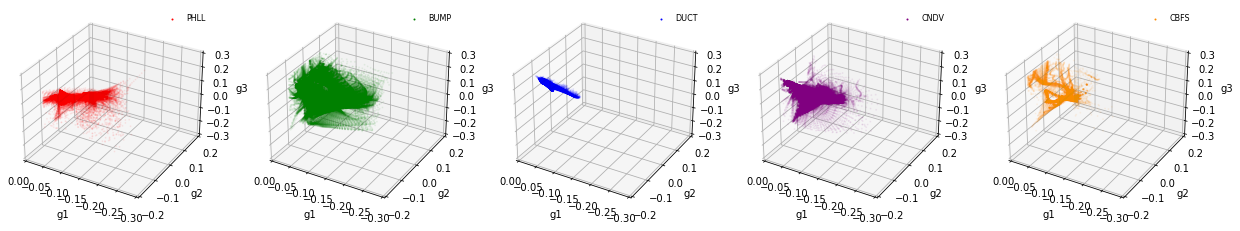

In [15]:
#%matplotlib widget
from matplotlib.lines import Line2D

colors = ['r','g','b','purple','darkorange']

plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(3.37*5,3.37),constrained_layout=True)
gs = fig.add_gridspec(1,5,hspace=0.,wspace=0.1
                     )

#ax1 = fig.add_subplot(gs[0],projection='3d')
#ax2 = fig.add_subplot(gs[1],projection='3d')
#ax3 = fig.add_subplot(gs[2],projection='3d')
#ax4 = fig.add_subplot(gs[3],projection='3d')
#ax5 = fig.add_subplot(gs[4],projection='3d')

for index, case_type in enumerate(prefix_list): 
    ax = fig.add_subplot(gs[index],projection='3d'
                        )
    df_case_type = df_pre[df_pre["Case"].str.contains(case_type)==True]
    ax.scatter(df_case_type['labels_g1_opt'],
                df_case_type['labels_g2_opt'],
                df_case_type['labels_g3_opt'],
               s=1,c=colors[index],alpha=0.05,label=case_type)
    leg = ax.legend(#bbox_to_anchor=(.8, 1.2),
        ncol=1,columnspacing=0.5,frameon=False,fancybox=False,edgecolor='k',fontsize=font_size_legend,labelspacing=.1)
    for lh in leg.legendHandles: 
        lh.set_alpha(1)
    
    ax.set_xlim([0,-0.3])
    ax.set_ylim([-0.2,0.2])
    ax.set_zlim([-0.3,0.3])
    ax.set_xlabel('g1')
    ax.set_ylabel('g2')
    ax.set_zlabel('g3')


#ax2.set_ylim([0,10])

leg = ax.legend(#bbox_to_anchor=(.8, 1.2),
    ncol=1,columnspacing=0.5,frameon=False,fancybox=False,edgecolor='k',fontsize=font_size_legend,labelspacing=.1)
for lh in leg.legendHandles: 
    lh.set_alpha(1)


#fig.tight_layout()
fig.savefig('3d.png',dpi=500,bbox_inches='tight')
#plt.ion()
#plt.show()

## Exploring covariance

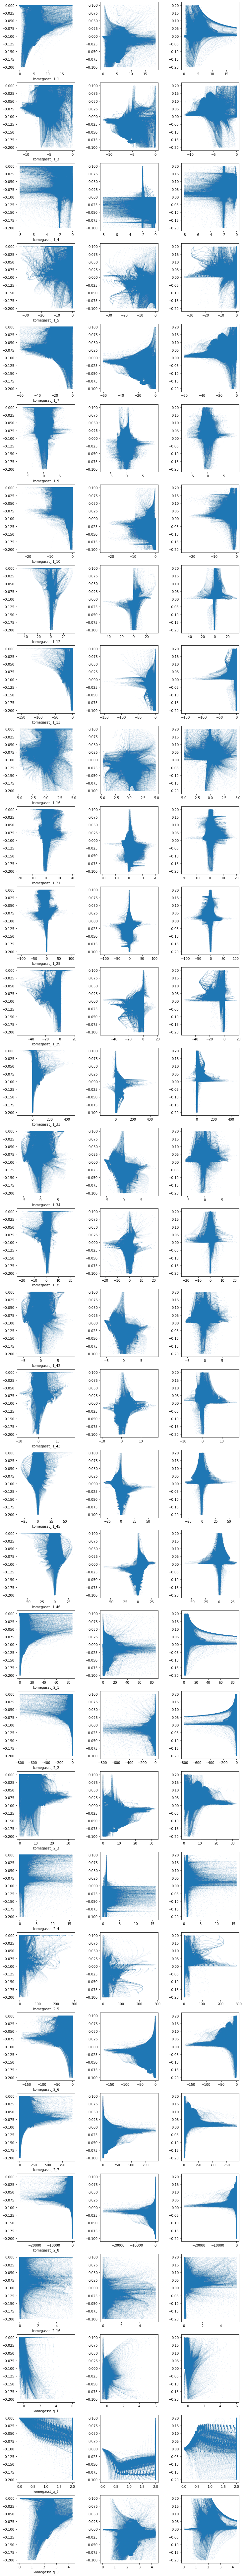

In [93]:
#fig = plt.figure(figsize = (50,50))
#ax = fig.gca()
#df_pre.hist(ax = ax)
#%matplotlib inline

import seaborn as sns

features = ['komegasst_I1_1',
                 'komegasst_I1_3',
                 'komegasst_I1_4',
                 'komegasst_I1_5',
                 'komegasst_I1_7',
                 'komegasst_I1_9',
                 'komegasst_I1_10',
                 'komegasst_I1_12',
                 'komegasst_I1_13',
                 'komegasst_I1_16',
                 'komegasst_I1_21',
                 'komegasst_I1_25',
                 'komegasst_I1_29',
                 'komegasst_I1_33',
                 'komegasst_I1_34',
                 'komegasst_I1_35',
                 'komegasst_I1_42',
                 'komegasst_I1_43',
                 'komegasst_I1_45',
                 'komegasst_I1_46',
                 'komegasst_I2_1',
                 'komegasst_I2_2',
                 'komegasst_I2_3',
                 'komegasst_I2_4',
                 'komegasst_I2_5',
                 'komegasst_I2_6',
                 'komegasst_I2_7',
                 'komegasst_I2_8',
                 'komegasst_I2_16',
                 'komegasst_q_1',
                 'komegasst_q_2',
                 'komegasst_q_3']
labels=[ 'labels_g1_opt',
          'labels_g2_opt',
          'labels_g3_opt']


fig = plt.figure(figsize=(3.37*3,3.37*len(features)),constrained_layout=True)
gs = fig.add_gridspec(len(features),3,hspace=0.,wspace=0.1
                     )
for index in range(len(features)):
    ax1 = fig.add_subplot(gs[index,0])
    ax2 = fig.add_subplot(gs[index,1])
    ax3 = fig.add_subplot(gs[index,2])

    #df_case_type = df_threshold[df_threshold["Case"].str.contains(case_type)==True]
    ax1.scatter(df_pre[features[index]],
                df_pre['labels_g1_opt'], s=1,#c=colors[index],
                alpha=0.05)
    ax2.scatter(df_pre[features[index]],
                df_pre['labels_g2_opt'], s=1,#c=colors[index],
                alpha=0.05)
    ax3.scatter(df_pre[features[index]],
                df_pre['labels_g3_opt'], s=1,#c=colors[index],
                alpha=0.05)
    ax1.set_xlabel(features[index])
                       #,label=case_type)
    #leg = ax.legend(#bbox_to_anchor=(.8, 1.2),
    #    ncol=1,columnspacing=0.5,frameon=False,fancybox=False,edgecolor='k',fontsize=font_size_legend,labelspacing=.1)
    #for lh in leg.legendHandles: 
    #    lh.set_alpha(1)
    
    #ax.set_xlim([0,-0.3])
    #ax.set_ylim([-0.2,0.2])
    #ax.set_zlim([-0.3,0.3])
    #ax.set_xlabel('g1')
    #ax.set_ylabel('g2')
    #ax.set_zlabel('g3')
    
#df_select = df_pre[columns]
#sns.pairplot(df_select, kind="reg")
#plt.show()
fig.savefig('correlation.png',dpi=100,bbox_inches='tight')


# Feature selection
Note: as discussed in the paper, we used the `featuresall` set

## Mutual info

In [10]:
from sklearn.feature_selection import mutual_info_regression

features = ['komegasst_I1_1',
                 'komegasst_I1_3',
                 'komegasst_I1_4',
                 'komegasst_I1_5',
                 'komegasst_I1_7',
                 'komegasst_I1_9',
                 'komegasst_I1_10',
                 'komegasst_I1_12',
                 'komegasst_I1_13',
                 'komegasst_I1_16',
                 'komegasst_I1_21',
                 'komegasst_I1_25',
                 'komegasst_I1_29',
                 'komegasst_I1_33',
                 'komegasst_I1_34',
                 'komegasst_I1_35',
                 'komegasst_I1_42',
                 'komegasst_I1_43',
                 'komegasst_I1_45',
                 'komegasst_I1_46',
                 'komegasst_I2_1',
                 'komegasst_I2_2',
                 'komegasst_I2_3',
                 'komegasst_I2_4',
                 'komegasst_I2_5',
                 'komegasst_I2_6',
                 'komegasst_I2_7',
                 'komegasst_I2_8',
                 'komegasst_I2_16',
                 'komegasst_q_1',
                 'komegasst_q_2',
                 'komegasst_q_3']

labels = ['labels_g1_opt',
          'labels_g2_opt',
          'labels_g3_opt']

df_features = df_pre[features]
mi_g1 = mutual_info_regression(df_features,df_pre['labels_g1_opt'])
mi_g2 = mutual_info_regression(df_features,df_pre['labels_g2_opt'])
mi_g3 = mutual_info_regression(df_features,df_pre['labels_g3_opt'])


ind_g1 = np.argsort(mi_g1)
features_g1_sorted= [features[i] for i in ind_g1]

ind_g2 = np.argsort(mi_g2)
features_g2_sorted= [features[i] for i in ind_g2]

ind_g3 = np.argsort(mi_g3)
features_g3_sorted= [features[i] for i in ind_g3]

mi_mean = np.mean( np.array([mi_g1,mi_g2,mi_g3]), axis = 0)
ind_mean = np.argsort(mi_mean)
features_mean_sorted= [features[i] for i in ind_mean]



In [11]:
features5 = features_mean_sorted[-5:]
features13 = features_mean_sorted[-13:]
features23 = features_mean_sorted[-23:]
featuresall = features_mean_sorted

## Visualize feature importance rankings

<ipython-input-24-55ac47f91bf0>:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


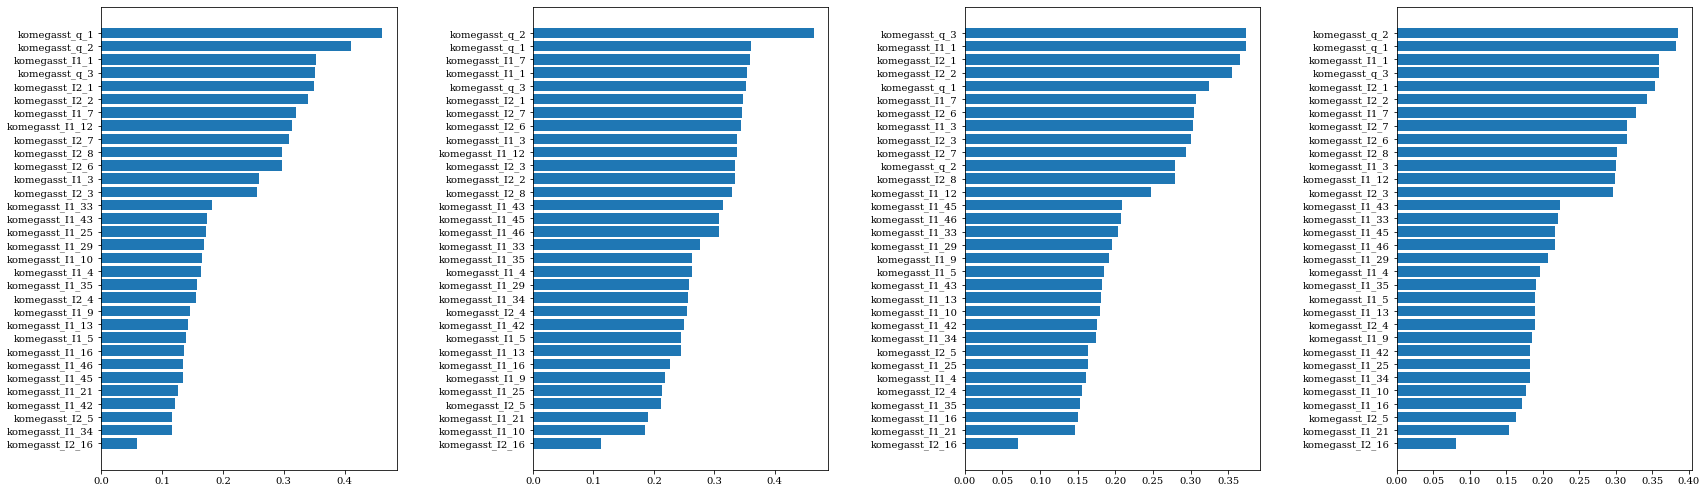

In [24]:
fig = plt.figure(figsize=(3.37*7,3.37*2),constrained_layout=True)
gs = fig.add_gridspec(1,4,hspace=0.1,wspace=0.1
                     )
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])

#df_case_type = df_threshold[df_threshold["Case"].str.contains(case_type)==True]
ax1.barh(features_g1_sorted,mi_g1[ind_g1], tick_label = features_g1_sorted)
ax2.barh(features_g2_sorted,mi_g2[ind_g2], tick_label = features_g2_sorted)
ax3.barh(features_g3_sorted,mi_g3[ind_g3], tick_label = features_g3_sorted)
ax4.barh(features_mean_sorted,mi_mean[ind_mean], tick_label = features_mean_sorted)

fig.tight_layout()
fig.savefig('mutual_information.png',dpi=100,bbox_inches='tight')

# Defining different model pipelines
This section should not depend on the number of data points - the exact data points will be specified later on.

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

scaler = MinMaxScaler()

def full_pipeline(regression_model):
    pipe = Pipeline(steps=[("scaler", scaler),
                       ("reg", regression_model)])
    return pipe

## XGBoost

In [13]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from skopt.space import Real, Categorical, Integer

estimator = xgb.XGBRegressor(
    objective = 'reg:squarederror',
    n_jobs=8,
    random_state = 7
    )

pipe_xgb = full_pipeline(MultiOutputRegressor(estimator = estimator))
print(pipe_xgb)

param_xgb =  {
    'reg__estimator__n_estimators': Integer(100,1000),
    'reg__estimator__max_depth': Integer(5,50),
    'reg__estimator__learning_rate': Real(1E-2,1),
    'reg__estimator__colsample_bytree': Real(0.5,1),
    'reg__estimator__subsample': Real(0.5,1)
  }
 


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('reg',
                 MultiOutputRegressor(estimator=XGBRegressor(base_score=None,
                                                             booster=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             enable_categorical=False,
                                                             gamma=None,
                                                             gpu_id=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                     

/home/ryley/anaconda3/envs/tf/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Random forests

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor


estimator = RandomForestRegressor(
    criterion='squared_error',
    n_jobs = 8,
    random_state=7)

pipe_rf = full_pipeline(MultiOutputRegressor(estimator = estimator))
print(pipe_rf)

param_rf =  {
    'reg__estimator__n_estimators': Integer(100,1000),
    'reg__estimator__max_depth': Integer(5,50),
    'reg__estimator__min_samples_split': Real(1E-5,1E-1, prior = 'log-uniform'),
    'reg__estimator__min_samples_leaf': Real(1E-5,1E-1, prior = 'log-uniform'),
    'reg__estimator__max_features': Real(0.5,1),
    'reg__estimator__max_samples': Real(0.5,1)
  }
 

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('reg',
                 MultiOutputRegressor(estimator=RandomForestRegressor(n_jobs=8,
                                                                      random_state=7)))])


## Neural network

In [15]:

def keras_neural_network(activation_func, n_hidden_layers, n_neurons, l1, l2, learning_rate):
    initializer = tf.keras.initializers.LecunNormal(seed=7)

    inputs=keras.Input(shape = 32)
    dense = layers.Dense(n_neurons, activation = activation_func, kernel_regularizer = regularizers.l1_l2(l1=l1, l2=l2),kernel_initializer= initializer)
    x = dense(inputs)
    for i in range(n_hidden_layers):
        x = layers.Dense(n_neurons, activation = activation_func, kernel_regularizer = regularizers.l1_l2(l1=l1, l2=l2),kernel_initializer= initializer) (x)
    
    outputs = layers.Dense(3, activation = 'linear', kernel_initializer= initializer)(x)
    model = keras.Model(inputs = inputs, outputs = outputs)
    optimizer = keras.optimizers.Nadam(learning_rate=learning_rate)
    model.compile(optimizer, loss='mse')
    #print(model.summary)
    return model

from scikeras.wrappers import KerasRegressor

estimator = KerasRegressor(model = keras_neural_network,
                           #loss = "mean_squared_error",
                           #metric = ["mse"],
                           #optimizer = "Nadam",
                           verbose = 0)

pipe_nn = full_pipeline(estimator)
print(pipe_nn)

param_nn =  {
    #'reg__model__inputs': Categorical([inputs]),
    'reg__model__n_hidden_layers': Integer(3,20),
    'reg__model__n_neurons': Integer(30,800),
    'reg__model__activation_func': Categorical(["relu", "selu", "elu"]),
    'reg__model__l1': Real(1E-8,1E-1, prior = 'log-uniform'),
    'reg__model__l2': Real(1E-8,1E-1, prior = 'log-uniform'),
    'reg__model__l2': Real(1E-8,1E-1, prior = 'log-uniform'),
    'reg__model__learning_rate': Real(1E-7,1E-3, prior = 'log-uniform'),

    #'reg__estimator__batch_size': Categorical([512, 1000]),
    #'reg__estimator__optimizer__epochs': Integer(300,5000),

  }
print(estimator.get_params().keys())     

es_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=1E-12,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

nn_fit_params = {
    'callbacks' : [es_callback],
    'epochs' : 2000,
    'shuffle': False
}


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('reg',
                 KerasRegressor(model=<function keras_neural_network at 0x7f5558066af0>, verbose=0))])
dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs'])


## Linear regression

In [16]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
estimator = LinearRegression(
    n_jobs = 8)

pipe_lr = full_pipeline(MultiOutputRegressor(estimator = estimator))
print(pipe_lr)


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('reg',
                 MultiOutputRegressor(estimator=LinearRegression(n_jobs=8)))])


# Search on various training datasets

In [17]:
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from skopt.callbacks import CheckpointSaver

labels = ['labels_g1_opt',
          'labels_g2_opt',
          'labels_g3_opt']

In [18]:

def fulldf_select_case_x_y(df, case_prefix_list, feature_name_list, label_name_list, shuffle=False):
    if shuffle:
        df = df.sample(frac=1,random_state=7)
    # Select rows that have Case name containing entry in the case_prefix_listS
    df = df[df['Case'].apply(lambda x: any([k in x for k in case_prefix_list]))]
    x = df[feature_name_list]
    y = df[label_name_list]
    cases_list = df['Case']
    return x, y, cases_list



In [19]:
features = ['komegasst_I1_1',
                 'komegasst_I1_3',
                 'komegasst_I1_4',
                 'komegasst_I1_5',
                 'komegasst_I1_7',
                 'komegasst_I1_9',
                 'komegasst_I1_10',
                 'komegasst_I1_12',
                 'komegasst_I1_13',
                 'komegasst_I1_16',
                 'komegasst_I1_21',
                 'komegasst_I1_25',
                 'komegasst_I1_29',
                 'komegasst_I1_33',
                 'komegasst_I1_34',
                 'komegasst_I1_35',
                 'komegasst_I1_42',
                 'komegasst_I1_43',
                 'komegasst_I1_45',
                 'komegasst_I1_46',
                 'komegasst_I2_1',
                 'komegasst_I2_2',
                 'komegasst_I2_3',
                 'komegasst_I2_4',
                 'komegasst_I2_5',
                 'komegasst_I2_6',
                 'komegasst_I2_7',
                 'komegasst_I2_8',
                 'komegasst_I2_16',
                 'komegasst_q_1',
                 'komegasst_q_2',
                 'komegasst_q_3']

## Periodic hills

In [23]:
from functools import partial

df_tv = df_pre.loc[df_pre['Case'] != 'PHLL_case_1p2']

select_feature_set = partial(fulldf_select_case_x_y,df = df_tv, 
                            case_prefix_list = ['PHLL',],
                            label_name_list = labels,
                                         shuffle=True)

x5, y, cases_list = select_feature_set(feature_name_list = features5)
x13, y, cases_list = select_feature_set(feature_name_list = features13)
x23, y, cases_list = select_feature_set(feature_name_list = features23)
xall, y, cases_list = select_feature_set(feature_name_list = featuresall)

"""
x, y, cases_list = fulldf_select_case_x_y(df_tv, 
                            case_prefix_list = ['PHLL',],
                            feature_name_list = features,
                            label_name_list = labels,
                                         shuffle=True)
"""
print('Data points: ' + str(len(x5)))
print('Case list  : ' + str(set(cases_list)))


Data points: 46600
Case list  : {'PHLL_case_1p0', 'PHLL_case_0p5', 'PHLL_case_1p5', 'PHLL_case_0p8'}


### XGBoost

In [19]:
import time
import joblib
from datetime import datetime
from sklearn.model_selection import GroupKFold

for i, x in enumerate([xall]):
    t0 = time.time()
    search_xgb_PHLL = BayesSearchCV(pipe_xgb, param_xgb,
                              scoring='neg_mean_squared_error', 
                              n_jobs=8, verbose=10,
                              cv =GroupKFold(n_splits=4),
                              n_iter = 100,
                              random_state=7)
    search_xgb_PHLL.fit(x, y, groups=cases_list)
    t1 = time.time()
    total = t1-t0
    print(total)
    print("Best parameter (CV score=%0.5E):" % search_xgb_PHLL.best_score_)
    print(search_xgb_PHLL.best_params_)
    joblib.dump(search_xgb_PHLL, 'hyperparameter_tuning/search_xgb_PHLL_fs'+
                str(i)+'_bestscore'+'%0.3E'%search_xgb_PHLL.best_score_+
                '_walltime_'+str(int(total))+'_'+'date'+datetime.now().strftime("%d-%m-%Y-%H:%M:%S")+'.pkl')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fi

### Random forests

In [20]:
import time
import joblib
from datetime import datetime
from sklearn.model_selection import GroupKFold

for i, x in enumerate([xall]):
    t0 = time.time()
    search_rf_PHLL = BayesSearchCV(pipe_rf, param_rf,
                              scoring='neg_mean_squared_error', 
                              n_jobs=8, verbose=100,
                              cv =GroupKFold(n_splits=4),
                              n_iter = 100,
                              random_state=7)
    search_rf_PHLL.fit(x, y, groups=cases_list)
    t1 = time.time()
    total = t1-t0
    print(total)
    print("Best parameter (CV score=%0.5E):" % search_rf_PHLL.best_score_)
    print(search_rf_PHLL.best_params_)
    joblib.dump(search_rf_PHLL, 'hyperparameter_tuning/search_rf_PHLL_fs'+
                str(i)+'_bestscore'+'%0.3E'%search_rf_PHLL.best_score_+
                '_walltime_'+str(int(total))+'_'+'date'+datetime.now().strftime("%d-%m-%Y-%H:%M:%S")+'.pkl')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fi

### Neural network

In [27]:
import time
import joblib
from datetime import datetime
from sklearn.model_selection import GroupKFold

for i, x in enumerate([xall]):
    t0 = time.time()
    search_nn_PHLL = BayesSearchCV(pipe_nn, param_nn,
                              scoring='neg_mean_squared_error', 
                              n_jobs=1, verbose=10,
                              cv =GroupKFold(n_splits=4),
                              n_iter = 100,
                              random_state=7,
                              fit_params = nn_fit_params)
    search_nn_PHLL.fit(x, y, groups=cases_list, )
    t1 = time.time()
    total = t1-t0
    print(total)
    print("Best parameter (CV score=%0.5E):" % search_nn_PHLL.best_score_)
    print(search_nn_PHLL.best_params_)
    joblib.dump(search_nn_PHLL, 'hyperparameter_tuning/search_nn_PHLL_fs'+
                str(i)+'_bestscore'+'%0.3E'%search_nn_PHLL.best_score_+
                '_walltime_'+str(int(total))+'_'+'date'+datetime.now().strftime("%d-%m-%Y-%H:%M:%S")+'.pkl')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4; 1/1] START reg__model__activation_func=selu, reg__model__l1=0.010240842870936033, reg__model__l2=0.07637437850710392, reg__model__learning_rate=2.570266861290388e-07, reg__model__n_hidden_layers=10, reg__model__n_neurons=360
[CV 1/4; 1/1] END reg__model__activation_func=selu, reg__model__l1=0.010240842870936033, reg__model__l2=0.07637437850710392, reg__model__learning_rate=2.570266861290388e-07, reg__model__n_hidden_layers=10, reg__model__n_neurons=360;, score=-0.021 total time=   9.5s
[CV 2/4; 1/1] START reg__model__activation_func=selu, reg__model__l1=0.010240842870936033, reg__model__l2=0.07637437850710392, reg__model__learning_rate=2.570266861290388e-07, reg__model__n_hidden_layers=10, reg__model__n_neurons=360
[CV 2/4; 1/1] END reg__model__activation_func=selu, reg__model__l1=0.010240842870936033, reg__model__l2=0.07637437850710392, reg__model__learning_rate=2.570266861290388e-07, reg__model__n_hidden_layers=10, r

### Linear Regression

In [65]:
import time
import joblib
from datetime import datetime
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_val_score

for i, x in enumerate([xall]):
    t0 = time.time()
    #search_rf_PHLL = BayesSearchCV(pipe_rf, param_rf,
    #                          scoring='neg_mean_squared_error', 
    #                          n_jobs=8, verbose=100,
    #                          cv =GroupKFold(n_splits=4),
    #                          n_iter = 100,
    #                          random_state=7)
    cvscore_lr = cross_val_score(pipe_lr, x, y, cv = GroupKFold(n_splits=4),scoring='neg_mean_squared_error', groups=cases_list)
    meanscore = np.mean(cvscore_lr)
    model_lr = pipe_lr.fit(x,y)
    #search_rf_PHLL.fit(x, y, groups=cases_list)
    t1 = time.time()
    total = t1-t0
    print(cvscore_lr)
    print(model_lr)
    #print("Best parameter (CV score=%0.5E):" % search_rf_PHLL.best_score_)
    #print(search_rf_PHLL.best_params_)
    joblib.dump(model_lr, 'hyperparameter_tuning/search_lr_PHLL_fs'+
                str(i)+'_meanCVscore'+'%0.3E'%meanscore+
                '_walltime_'+str(int(total))+'_'+'date'+datetime.now().strftime("%d-%m-%Y-%H:%M:%S")+'.pkl')
    joblib.dump(cvscore_lr, 'hyperparameter_tuning/cv_scores_lr_PHLL_fs'+
                str(i)+'_meanCVscore'+'%0.3E'%meanscore+
                '_walltime_'+str(int(total))+'_'+'date'+datetime.now().strftime("%d-%m-%Y-%H:%M:%S")+'.pkl')

[-0.00084368 -0.00065917 -0.00063132 -0.00082668]
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('reg',
                 MultiOutputRegressor(estimator=LinearRegression(n_jobs=8)))])


## Parametric bumps

In [28]:
from functools import partial

df_tv = df_pre.loc[df_pre['Case'] != 'BUMP_h38']

select_feature_set = partial(fulldf_select_case_x_y,df = df_tv, 
                            case_prefix_list = ['BUMP',],
                            label_name_list = labels,
                                         shuffle=True)

x5, y, cases_list = select_feature_set(feature_name_list = features5)
x13, y, cases_list = select_feature_set(feature_name_list = features13)
x23, y, cases_list = select_feature_set(feature_name_list = features23)
xall, y, cases_list = select_feature_set(feature_name_list = featuresall)

print('Data points: ' + str(len(x5)))
print('Case list  : ' + str(set(cases_list)))


Data points: 231610
Case list  : {'BUMP_h20', 'BUMP_h31', 'BUMP_h42', 'BUMP_h26'}


### XGBoost

In [22]:
import time
import joblib
from datetime import datetime
from sklearn.model_selection import GroupKFold

for i, x in enumerate([xall]):
    t0 = time.time()
    search_xgb_BUMP = BayesSearchCV(pipe_xgb, param_xgb,
                              scoring='neg_mean_squared_error', 
                              n_jobs=8, verbose=10,
                              cv =GroupKFold(n_splits=4),
                              n_iter = 100,
                              random_state=7)
    search_xgb_BUMP.fit(x, y, groups=cases_list)
    t1 = time.time()
    total = t1-t0
    print(total)
    print("Best parameter (CV score=%0.5E):" % search_xgb_BUMP.best_score_)
    print(search_xgb_BUMP.best_params_)
    joblib.dump(search_xgb_BUMP, 'hyperparameter_tuning/search_xgb_BUMP_fs'+
                str(i)+'_bestscore'+'%0.3E'%search_xgb_BUMP.best_score_+
                '_walltime_'+str(int(total))+'_'+'date'+datetime.now().strftime("%d-%m-%Y-%H:%M:%S")+'.pkl')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fi

### Random forests

In [23]:
import time
import joblib
from datetime import datetime
from sklearn.model_selection import GroupKFold

for i, x in enumerate([xall]):
    t0 = time.time()
    search_rf_BUMP = BayesSearchCV(pipe_rf, param_rf,
                              scoring='neg_mean_squared_error', 
                              n_jobs=8, verbose=100,
                              cv =GroupKFold(n_splits=4),
                              n_iter = 100,
                              random_state=7)
    search_rf_BUMP.fit(x, y, groups=cases_list)
    t1 = time.time()
    total = t1-t0
    print(total)
    print("Best parameter (CV score=%0.5E):" % search_rf_BUMP.best_score_)
    print(search_rf_BUMP.best_params_)
    joblib.dump(search_rf_BUMP, 'hyperparameter_tuning/search_rf_BUMP_fs'+
                str(i)+'_bestscore'+'%0.3E'%search_rf_BUMP.best_score_+
                '_walltime_'+str(int(total))+'_'+'date'+datetime.now().strftime("%d-%m-%Y-%H:%M:%S")+'.pkl')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fi

### Neural network

In [29]:
import time
import joblib
from datetime import datetime
from sklearn.model_selection import GroupKFold

for i, x in enumerate([xall]):
    t0 = time.time()
    search_nn_BUMP = BayesSearchCV(pipe_nn, param_nn,
                              scoring='neg_mean_squared_error', 
                              n_jobs=1, verbose=10,
                              cv =GroupKFold(n_splits=4),
                              n_iter = 100,
                              random_state=7,
                              fit_params = nn_fit_params)
    search_nn_BUMP.fit(x, y, groups=cases_list, )
    t1 = time.time()
    total = t1-t0
    print(total)
    print("Best parameter (CV score=%0.5E):" % search_nn_BUMP.best_score_)
    print(search_nn_BUMP.best_params_)
    joblib.dump(search_nn_BUMP, 'hyperparameter_tuning/search_nn_BUMP_fs'+
                str(i)+'_bestscore'+'%0.3E'%search_nn_BUMP.best_score_+
                '_walltime_'+str(int(total))+'_'+'date'+datetime.now().strftime("%d-%m-%Y-%H:%M:%S")+'.pkl')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4; 1/1] START reg__model__activation_func=selu, reg__model__l1=0.010240842870936033, reg__model__l2=0.07637437850710392, reg__model__learning_rate=2.570266861290388e-07, reg__model__n_hidden_layers=10, reg__model__n_neurons=360
[CV 1/4; 1/1] END reg__model__activation_func=selu, reg__model__l1=0.010240842870936033, reg__model__l2=0.07637437850710392, reg__model__learning_rate=2.570266861290388e-07, reg__model__n_hidden_layers=10, reg__model__n_neurons=360;, score=-0.005 total time=  38.8s
[CV 2/4; 1/1] START reg__model__activation_func=selu, reg__model__l1=0.010240842870936033, reg__model__l2=0.07637437850710392, reg__model__learning_rate=2.570266861290388e-07, reg__model__n_hidden_layers=10, reg__model__n_neurons=360
[CV 2/4; 1/1] END reg__model__activation_func=selu, reg__model__l1=0.010240842870936033, reg__model__l2=0.07637437850710392, reg__model__learning_rate=2.570266861290388e-07, reg__model__n_hidden_layers=10, r

### Linear Regression

In [75]:
import time
import joblib
from datetime import datetime
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_val_score

for i, x in enumerate([xall]):
    t0 = time.time()
    #search_rf_PHLL = BayesSearchCV(pipe_rf, param_rf,
    #                          scoring='neg_mean_squared_error', 
    #                          n_jobs=8, verbose=100,
    #                          cv =GroupKFold(n_splits=4),
    #                          n_iter = 100,
    #                          random_state=7)
    cvscore_lr = cross_val_score(pipe_lr, x, y, cv = GroupKFold(n_splits=4),scoring='neg_mean_squared_error', groups=cases_list)
    meanscore = np.mean(cvscore_lr)
    model_lr = pipe_lr.fit(x,y)
    #search_rf_PHLL.fit(x, y, groups=cases_list)
    t1 = time.time()
    total = t1-t0
    print(cvscore_lr)
    print(model_lr)
    #print("Best parameter (CV score=%0.5E):" % search_rf_PHLL.best_score_)
    #print(search_rf_PHLL.best_params_)
    joblib.dump(model_lr, 'hyperparameter_tuning/search_lr_BUMP_fs'+
                str(i)+'_meanCVscore'+'%0.3E'%meanscore+
                '_walltime_'+str(int(total))+'_'+'date'+datetime.now().strftime("%d-%m-%Y-%H:%M:%S")+'.pkl')
    joblib.dump(cvscore_lr, 'hyperparameter_tuning/cv_scores_lr_BUMP_fs'+
                str(i)+'_meanCVscore'+'%0.3E'%meanscore+
                '_walltime_'+str(int(total))+'_'+'date'+datetime.now().strftime("%d-%m-%Y-%H:%M:%S")+'.pkl')

[-5.18940401e+02 -7.66215799e-04 -8.21339190e-04 -5.02762762e+00]
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('reg',
                 MultiOutputRegressor(estimator=LinearRegression(n_jobs=8)))])


## Square Duct

In [32]:
from functools import partial

df_tv = df_pre.loc[df_pre['Case'] != 'DUCT_2400']

select_feature_set = partial(fulldf_select_case_x_y,df = df_tv, 
                            case_prefix_list = ['DUCT',],
                            label_name_list = labels,
                                         shuffle=True)

x5, y, cases_list = select_feature_set(feature_name_list = features5)
x13, y, cases_list = select_feature_set(feature_name_list = features13)
x23, y, cases_list = select_feature_set(feature_name_list = features23)
xall, y, cases_list = select_feature_set(feature_name_list = featuresall)

print('Data points: ' + str(len(x5)))
print('Case list  : ' + str(set(cases_list)))


Data points: 34293
Case list  : {'DUCT_2000', 'DUCT_1500', 'DUCT_1600', 'DUCT_1350', 'DUCT_1800', 'DUCT_1250', 'DUCT_3200', 'DUCT_2900', 'DUCT_1100', 'DUCT_2600', 'DUCT_1400', 'DUCT_3500', 'DUCT_1150', 'DUCT_1300', 'DUCT_2205'}


### XGBoost

In [25]:
import time
import joblib
from datetime import datetime
from sklearn.model_selection import GroupKFold

for i, x in enumerate([xall]):
    t0 = time.time()
    search_xgb_DUCT = BayesSearchCV(pipe_xgb, param_xgb,
                              scoring='neg_mean_squared_error', 
                              n_jobs=8, verbose=10,
                              cv =GroupKFold(n_splits=4),
                              n_iter = 100,
                              random_state=7)
    search_xgb_DUCT.fit(x, y, groups=cases_list)
    t1 = time.time()
    total = t1-t0
    print(total)
    print("Best parameter (CV score=%0.5E):" % search_xgb_DUCT.best_score_)
    print(search_xgb_DUCT.best_params_)
    joblib.dump(search_xgb_DUCT, 'hyperparameter_tuning/search_xgb_DUCT_fs'+
                str(i)+'_bestscore'+'%0.3E'%search_xgb_DUCT.best_score_+
                '_walltime_'+str(int(total))+'_'+'date'+datetime.now().strftime("%d-%m-%Y-%H:%M:%S")+'.pkl')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fi

### Random forests

In [26]:
import time
import joblib
from datetime import datetime
from sklearn.model_selection import GroupKFold

for i, x in enumerate([xall]):
    t0 = time.time()
    search_rf_DUCT = BayesSearchCV(pipe_rf, param_rf,
                              scoring='neg_mean_squared_error', 
                              n_jobs=8, verbose=100,
                              cv =GroupKFold(n_splits=4),
                              n_iter = 100,
                              random_state=7)
    search_rf_DUCT.fit(x, y, groups=cases_list)
    t1 = time.time()
    total = t1-t0
    print(total)
    print("Best parameter (CV score=%0.5E):" % search_rf_DUCT.best_score_)
    print(search_rf_DUCT.best_params_)
    joblib.dump(search_rf_DUCT, 'hyperparameter_tuning/search_rf_DUCT_fs'+
                str(i)+'_bestscore'+'%0.3E'%search_rf_DUCT.best_score_+
                '_walltime_'+str(int(total))+'_'+'date'+datetime.now().strftime("%d-%m-%Y-%H:%M:%S")+'.pkl')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fi

### Neural network

In [33]:
import time
import joblib
from datetime import datetime
from sklearn.model_selection import GroupKFold

for i, x in enumerate([xall]):
    t0 = time.time()
    search_nn_DUCT = BayesSearchCV(pipe_nn, param_nn,
                              scoring='neg_mean_squared_error', 
                              n_jobs=1, verbose=10,
                              cv =GroupKFold(n_splits=4),
                              n_iter = 100,
                              random_state=7,
                              fit_params = nn_fit_params)
    search_nn_DUCT.fit(x, y, groups=cases_list, )
    t1 = time.time()
    total = t1-t0
    print(total)
    print("Best parameter (CV score=%0.5E):" % search_nn_DUCT.best_score_)
    print(search_nn_DUCT.best_params_)
    joblib.dump(search_nn_DUCT, 'hyperparameter_tuning/search_nn_DUCT_fs'+
                str(i)+'_bestscore'+'%0.3E'%search_nn_DUCT.best_score_+
                '_walltime_'+str(int(total))+'_'+'date'+datetime.now().strftime("%d-%m-%Y-%H:%M:%S")+'.pkl')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4; 1/1] START reg__model__activation_func=selu, reg__model__l1=0.010240842870936033, reg__model__l2=0.07637437850710392, reg__model__learning_rate=2.570266861290388e-07, reg__model__n_hidden_layers=10, reg__model__n_neurons=360
[CV 1/4; 1/1] END reg__model__activation_func=selu, reg__model__l1=0.010240842870936033, reg__model__l2=0.07637437850710392, reg__model__learning_rate=2.570266861290388e-07, reg__model__n_hidden_layers=10, reg__model__n_neurons=360;, score=-0.054 total time=   8.1s
[CV 2/4; 1/1] START reg__model__activation_func=selu, reg__model__l1=0.010240842870936033, reg__model__l2=0.07637437850710392, reg__model__learning_rate=2.570266861290388e-07, reg__model__n_hidden_layers=10, reg__model__n_neurons=360
[CV 2/4; 1/1] END reg__model__activation_func=selu, reg__model__l1=0.010240842870936033, reg__model__l2=0.07637437850710392, reg__model__learning_rate=2.570266861290388e-07, reg__model__n_hidden_layers=10, r

### Linear Regression

In [69]:
import time
import joblib
from datetime import datetime
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_val_score

for i, x in enumerate([xall]):
    t0 = time.time()
    cvscore_lr = cross_val_score(pipe_lr, x, y, cv = GroupKFold(n_splits=4),scoring='neg_mean_squared_error', groups=cases_list)
    meanscore = np.mean(cvscore_lr)
    model_lr = pipe_lr.fit(x,y)
    t1 = time.time()
    total = t1-t0
    print(cvscore_lr)
    print(model_lr)

    joblib.dump(model_lr, 'hyperparameter_tuning/search_lr_DUCT_fs'+
                str(i)+'_meanCVscore'+'%0.3E'%meanscore+
                '_walltime_'+str(int(total))+'_'+'date'+datetime.now().strftime("%d-%m-%Y-%H:%M:%S")+'.pkl')
    joblib.dump(cvscore_lr, 'hyperparameter_tuning/cv_scores_lr_DUCT_fs'+
                str(i)+'_meanCVscore'+'%0.3E'%meanscore+
                '_walltime_'+str(int(total))+'_'+'date'+datetime.now().strftime("%d-%m-%Y-%H:%M:%S")+'.pkl')

[-0.00023835 -0.00021944 -0.0002298  -0.00022123]
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('reg',
                 MultiOutputRegressor(estimator=LinearRegression(n_jobs=8)))])


## Full training set

In [34]:
from functools import partial
print(len(df_pre))
df_tv = df_pre.loc[(df_pre['Case'] != 'DUCT_2400') &
                   (df_pre['Case'] != 'PHLL_case_1p2') &
                   (df_pre['Case'] != 'BUMP_h38') &
                   (df_pre['Case'] != 'CNDV_20580') &
                   (df_pre['Case'] != 'CBFS_13700')]

select_feature_set = partial(fulldf_select_case_x_y,df = df_tv, 
                            case_prefix_list = ['PHLL','DUCT','BUMP','CNDV'],
                            label_name_list = labels,
                                         shuffle=True)

x5, y, cases_list = select_feature_set(feature_name_list = features5)
x13, y, cases_list = select_feature_set(feature_name_list = features13)
x23, y, cases_list = select_feature_set(feature_name_list = features23)
xall, y, cases_list = select_feature_set(feature_name_list = featuresall)

print('Data points: ' + str(len(x5)))
print('Case list  : ' + str(set(cases_list)))


663254
Data points: 402758
Case list  : {'DUCT_1500', 'DUCT_1600', 'CNDV_12600', 'DUCT_1800', 'DUCT_3200', 'DUCT_2600', 'PHLL_case_0p5', 'PHLL_case_1p0', 'DUCT_1350', 'PHLL_case_1p5', 'PHLL_case_0p8', 'DUCT_1100', 'DUCT_1400', 'DUCT_1150', 'BUMP_h31', 'DUCT_1300', 'BUMP_h20', 'BUMP_h26', 'DUCT_2900', 'DUCT_3500', 'BUMP_h42', 'DUCT_2205', 'DUCT_2000', 'DUCT_1250'}


### XGBoost

In [33]:
import time
import joblib
from datetime import datetime
from sklearn.model_selection import GroupKFold

for i, x in enumerate([xall]):
    t0 = time.time()
    search_xgb_full = BayesSearchCV(pipe_xgb, param_xgb,
                              scoring='neg_mean_squared_error', 
                              n_jobs=8, verbose=10,
                              cv =GroupKFold(n_splits=4),
                              n_iter = 100,
                              random_state=7)
    search_xgb_full.fit(x, y, groups=cases_list)
    t1 = time.time()
    total = t1-t0
    print(total)
    print("Best parameter (CV score=%0.5E):" % search_xgb_full.best_score_)
    print(search_xgb_full.best_params_)
    joblib.dump(search_xgb_full, 'hyperparameter_tuning/search_xgb_full_fs'+
                str(i)+'_bestscore'+'%0.3E'%search_xgb_full.best_score_+
                '_walltime_'+str(int(total))+'_'+'date'+datetime.now().strftime("%d-%m-%Y-%H:%M:%S")+'.pkl')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fi

### Random forests

In [ ]:
import time
import joblib
from datetime import datetime
from sklearn.model_selection import GroupKFold

for i, x in enumerate([xall]):
    t0 = time.time()
    search_rf_full = BayesSearchCV(pipe_rf, param_rf,
                              scoring='neg_mean_squared_error', 
                              n_jobs=8, verbose=100,
                              cv =GroupKFold(n_splits=4),
                              n_iter = 100,
                              random_state=7)
    search_rf_full.fit(x, y, groups=cases_list)
    t1 = time.time()
    total = t1-t0
    print(total)
    print("Best parameter (CV score=%0.5E):" % search_rf_full.best_score_)
    print(search_rf_full.best_params_)
    joblib.dump(search_rf_full, 'hyperparameter_tuning/search_rf_full_fs'+
                str(i)+'_bestscore'+'%0.3E'%search_rf_full.best_score_+
                '_walltime_'+str(int(total))+'_'+'date'+datetime.now().strftime("%d-%m-%Y-%H:%M:%S")+'.pkl')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fi

### Neural network

In [38]:
import time
import joblib
from datetime import datetime
from sklearn.model_selection import GroupKFold

for i, x in enumerate([xall]):
    t0 = time.time()
    search_nn_full = BayesSearchCV(pipe_nn, param_nn,
                              scoring='neg_mean_squared_error', 
                              n_jobs=1, verbose=10,
                              cv =GroupKFold(n_splits=4),
                              n_iter = 100,
                              random_state=7,
                              fit_params = nn_fit_params)
    search_nn_full.fit(x, y, groups=cases_list, )
    t1 = time.time()
    total = t1-t0
    print(total)
    print("Best parameter (CV score=%0.5E):" % search_nn_full.best_score_)
    print(search_nn_full.best_params_)
    joblib.dump(search_nn_full, 'hyperparameter_tuning/search_nn_full_fs'+
                str(i)+'_bestscore'+'%0.3E'%search_nn_full.best_score_+
                '_walltime_'+str(int(total))+'_'+'date'+datetime.now().strftime("%d-%m-%Y-%H:%M:%S")+'.pkl')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4; 1/1] START reg__model__activation_func=selu, reg__model__l1=0.010240842870936033, reg__model__l2=0.07637437850710392, reg__model__learning_rate=2.570266861290388e-07, reg__model__n_hidden_layers=10, reg__model__n_neurons=360


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7fd86933a310>
Traceback (most recent call last):
  File "/usr/lib/python3.8/weakref.py", line 345, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 

KeyboardInterrupt



### Linear Regression

In [74]:
import time
import joblib
from datetime import datetime
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_val_score

for i, x in enumerate([xall]):
    t0 = time.time()
    cvscore_lr = cross_val_score(pipe_lr, x, y, cv = GroupKFold(n_splits=4),scoring='neg_mean_squared_error', groups=cases_list)
    meanscore = np.mean(cvscore_lr)
    model_lr = pipe_lr.fit(x,y)
    t1 = time.time()
    total = t1-t0
    print(cvscore_lr)
    print(model_lr)

    joblib.dump(model_lr, 'hyperparameter_tuning/search_lr_full_fs'+
                str(i)+'_meanCVscore'+'%0.3E'%meanscore+
                '_walltime_'+str(int(total))+'_'+'date'+datetime.now().strftime("%d-%m-%Y-%H:%M:%S")+'.pkl')
    joblib.dump(cvscore_lr, 'hyperparameter_tuning/cv_scores_lr_full_fs'+
                str(i)+'_meanCVscore'+'%0.3E'%meanscore+
                '_walltime_'+str(int(total))+'_'+'date'+datetime.now().strftime("%d-%m-%Y-%H:%M:%S")+'.pkl')

[-5.18940401e+02 -7.66215799e-04 -8.21339190e-04 -5.02762762e+00]
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('reg',
                 MultiOutputRegressor(estimator=LinearRegression(n_jobs=8)))])


# Test on various cases

In [20]:
test_df = df_pre

In [21]:
import joblib 

nn_phll = joblib.load('hyperparameter_tuning/final_complete/search_nn_PHLL_fs0_bestscore-6.365E-04_walltime_4955_date29-04-2022-15:21:46.pkl')
nn_bump = joblib.load('hyperparameter_tuning/final_complete/search_nn_BUMP_fs0_bestscore-5.168E-04_walltime_18573_date29-04-2022-20:51:03.pkl')
nn_duct = joblib.load('hyperparameter_tuning/final_complete/search_nn_DUCT_fs0_bestscore-4.130E-05_walltime_3582_date30-04-2022-01:44:25.pkl')
nn_full = joblib.load('hyperparameter_tuning/final_complete/search_nn_full_fs0_bestscore-7.541E-04_walltime_30507_date30-04-2022-10:12:57.pkl')

lr_phll = joblib.load('hyperparameter_tuning/final_complete/search_lr_PHLL_fs0_meanCVscore-7.402E-04_walltime_0_date24-04-2022-20:23:21.pkl')
lr_bump = joblib.load('hyperparameter_tuning/final_complete/search_lr_BUMP_fs0_meanCVscore-1.310E+02_walltime_1_date24-04-2022-20:27:19.pkl')
lr_duct = joblib.load('hyperparameter_tuning/final_complete/search_lr_DUCT_fs0_meanCVscore-2.272E-04_walltime_0_date24-04-2022-20:24:30.pkl')
lr_full = joblib.load('hyperparameter_tuning/final_complete/search_lr_full_fs0_meanCVscore-1.310E+02_walltime_1_date24-04-2022-20:26:13.pkl')

xgb_phll = joblib.load('hyperparameter_tuning/final_complete/search_xgb_PHLL_fs0_bestscore-1.083E-04_walltime_2921_date21-04-2022-22:48:39.pkl')
xgb_bump = joblib.load('hyperparameter_tuning/final_complete/search_xgb_BUMP_fs0_bestscore-2.484E-04_walltime_18521_date22-04-2022-05:55:16.pkl')
xgb_duct = joblib.load('hyperparameter_tuning/final_complete/search_xgb_DUCT_fs0_bestscore-1.140E-05_walltime_1701_date22-04-2022-17:16:13.pkl')
xgb_full = joblib.load('hyperparameter_tuning/final_complete/search_xgb_full_fs0_bestscore-3.035E-04_walltime_39285_date23-04-2022-06:01:37.pkl')

rf_phll = joblib.load('hyperparameter_tuning/final_complete/search_rf_PHLL_fs0_bestscore-1.296E-04_walltime_7064_date22-04-2022-00:46:27.pkl')
rf_bump = joblib.load('hyperparameter_tuning/final_complete/search_rf_BUMP_fs0_bestscore-2.760E-04_walltime_39146_date22-04-2022-16:47:44.pkl')
rf_duct = joblib.load('hyperparameter_tuning/final_complete/search_rf_DUCT_fs0_bestscore-1.215E-05_walltime_5057_date22-04-2022-18:40:32.pkl')
rf_full = joblib.load('hyperparameter_tuning/final_complete/search_rf_full_fs0_bestscore-3.028E-04_walltime_70603_date25-04-2022-16:18:33.pkl')


In [22]:
from sklearn.metrics import mean_squared_error
def evaluate(model, x_test, y_test):
    mse = mean_squared_error(y_test,model.predict(x_test))
    #mse_mean = np.mean(mean_squared_error(y_test,model.predict(x_test)))
    return mse


In [23]:
weight_nn = 1/3
weight_rf = 1/3
weight_xgb = 1/3


nn_cv = 7.541E-04
rf_cv = 3.028E-04
xgb_cv = 3.035E-04

msebar = (nn_cv+rf_cv+xgb_cv)/3
msetotal = nn_cv+rf_cv+xgb_cv
print(msebar)

weight_cv_nn =  2/3 - nn_cv/msetotal
weight_cv_rf =  2/3 - rf_cv/msetotal
weight_cv_xgb =  2/3 -xgb_cv/msetotal


print(weight_cv_nn)
print(weight_cv_rf)
print(weight_cv_xgb)
print(weight_cv_nn+weight_cv_rf+weight_cv_xgb)


0.0004534666666666666
0.11234440850730176
0.4440850730177398
0.4435705184749583
0.9999999999999999


## CV performance

## PHLL

In [53]:
from functools import partial

df_test = test_df.loc[test_df['Case'] == 'PHLL_case_1p2']

select_feature_set = partial(fulldf_select_case_x_y,df = df_test, 
                            case_prefix_list = ['PHLL',],
                            label_name_list = labels,
                                         shuffle=True)

x_test, y_test, cases_list = select_feature_set(feature_name_list = featuresall)

In [52]:
print('lr_phll ' +'{:.3E}'.format(evaluate(lr_phll, x_test, y_test)))
print('lr_bump ' +'{:.3E}'.format(evaluate(lr_bump, x_test, y_test)))
print('lr_duct ' +'{:.3E}'.format(evaluate(lr_duct, x_test, y_test)))
print('lr_full ' +'{:.3E}'.format(evaluate(lr_full, x_test, y_test)))

print('XGB_phll ' +'{:.3E}'.format(evaluate(xgb_phll, x_test, y_test)))
print('XGB_bump ' +'{:.3E}'.format(evaluate(xgb_bump, x_test, y_test)))
print('XGB_duct ' +'{:.3E}'.format(evaluate(xgb_duct, x_test, y_test)))
print('XGB_full ' +'{:.3E}'.format(evaluate(xgb_full, x_test, y_test)))

print('rf_phll ' +'{:.3E}'.format(evaluate(rf_phll, x_test, y_test)))
print('rf_bump ' +'{:.3E}'.format(evaluate(rf_bump, x_test, y_test)))
print('rf_duct ' +'{:.3E}'.format(evaluate(rf_duct, x_test, y_test)))
print('rf_full ' +'{:.3e}'.format(evaluate(rf_full, x_test, y_test)))

print('nn_phll ' +'{:.3E}'.format(evaluate(nn_phll, x_test, y_test)))
print('nn_bump ' +'{:.3E}'.format(evaluate(nn_bump, x_test, y_test)))
print('nn_duct ' +'{:.3E}'.format(evaluate(nn_duct, x_test, y_test)))
print('nn_full ' +'{:.3e}'.format(evaluate(nn_full, x_test, y_test)))
print('equal_full_ensemble ' +'{:.3e}'.format(
    mean_squared_error(y_test,
                       weight_nn*nn_full.predict(x_test)+
                       weight_rf*rf_full.predict(x_test)+
                       weight_xgb*xgb_full.predict(x_test)
                      )
))
print('score_full_ensemble ' +'{:.3e}'.format(
    mean_squared_error(y_test,
                       weight_cv_nn*nn_full.predict(x_test)+
                       weight_cv_rf*rf_full.predict(x_test)+
                       weight_cv_xgb*xgb_full.predict(x_test)
                      )
))

(11744, 3)


TypeError: object of type 'numpy.float64' has no len()

## BUMP

In [105]:
from functools import partial

df_test = test_df.loc[test_df['Case'] == 'BUMP_h38']

select_feature_set = partial(fulldf_select_case_x_y,df = df_test, 
                            case_prefix_list = ['BUMP',],
                            label_name_list = labels,
                                         shuffle=True)

x_test, y_test, cases_list = select_feature_set(feature_name_list = featuresall)

In [106]:
print('lr_phll ' +'{:.3E}'.format(evaluate(lr_phll, x_test, y_test)))
print('lr_bump ' +'{:.3E}'.format(evaluate(lr_bump, x_test, y_test)))
print('lr_duct ' +'{:.3E}'.format(evaluate(lr_duct, x_test, y_test)))
print('lr_full ' +'{:.3E}'.format(evaluate(lr_full, x_test, y_test)))

print('XGB_phll ' +'{:.3E}'.format(evaluate(xgb_phll, x_test, y_test)))
print('XGB_bump ' +'{:.3E}'.format(evaluate(xgb_bump, x_test, y_test)))
print('XGB_duct ' +'{:.3E}'.format(evaluate(xgb_duct, x_test, y_test)))
print('XGB_full ' +'{:.3E}'.format(evaluate(xgb_full, x_test, y_test)))

print('rf_phll ' +'{:.3E}'.format(evaluate(rf_phll, x_test, y_test)))
print('rf_bump ' +'{:.3E}'.format(evaluate(rf_bump, x_test, y_test)))
print('rf_duct ' +'{:.3E}'.format(evaluate(rf_duct, x_test, y_test)))
print('rf_full ' +'{:.3e}'.format(evaluate(rf_full, x_test, y_test)))

print('nn_phll ' +'{:.3E}'.format(evaluate(nn_phll, x_test, y_test)))
print('nn_bump ' +'{:.3E}'.format(evaluate(nn_bump, x_test, y_test)))
print('nn_duct ' +'{:.3E}'.format(evaluate(nn_duct, x_test, y_test)))
print('nn_full ' +'{:.3e}'.format(evaluate(nn_full, x_test, y_test)))
print('equal_full_ensemble ' +'{:.3e}'.format(
    mean_squared_error(y_test,
                       weight_nn*nn_full.predict(x_test)+
                       weight_rf*rf_full.predict(x_test)+
                       weight_xgb*xgb_full.predict(x_test)
                      )
))
print('score_full_ensemble ' +'{:.3e}'.format(
    mean_squared_error(y_test,
                       weight_cv_nn*nn_full.predict(x_test)+
                       weight_cv_rf*rf_full.predict(x_test)+
                       weight_cv_xgb*xgb_full.predict(x_test)
                      )
))

lr_phll 1.063E+04
lr_bump 1.035E-03
lr_duct 9.328E+11
lr_full 1.035E-03
XGB_phll 1.116E-03
XGB_bump 1.262E-04
XGB_duct 3.057E-03
XGB_full 1.360E-04
rf_phll 1.154E-03
rf_bump 1.315E-04
rf_duct 3.238E-03
rf_full 1.608e-04
nn_phll 3.046E+00
nn_bump 4.714E-04
nn_duct 4.848E+06
nn_full 9.735e-04
equal_full_ensemble 2.528e-04
score_full_ensemble 1.603e-04


## DUCT

In [107]:
from functools import partial

df_test = test_df.loc[test_df['Case'] == 'DUCT_2400']

select_feature_set = partial(fulldf_select_case_x_y,df = df_test, 
                            case_prefix_list = ['DUCT',],
                            label_name_list = labels,
                                         shuffle=True)

x_test, y_test, cases_list = select_feature_set(feature_name_list = featuresall)

In [108]:
print('lr_phll ' +'{:.3E}'.format(evaluate(lr_phll, x_test, y_test)))
print('lr_bump ' +'{:.3E}'.format(evaluate(lr_bump, x_test, y_test)))
print('lr_duct ' +'{:.3E}'.format(evaluate(lr_duct, x_test, y_test)))
print('lr_full ' +'{:.3E}'.format(evaluate(lr_full, x_test, y_test)))

print('XGB_phll ' +'{:.3E}'.format(evaluate(xgb_phll, x_test, y_test)))
print('XGB_bump ' +'{:.3E}'.format(evaluate(xgb_bump, x_test, y_test)))
print('XGB_duct ' +'{:.3E}'.format(evaluate(xgb_duct, x_test, y_test)))
print('XGB_full ' +'{:.3E}'.format(evaluate(xgb_full, x_test, y_test)))

print('rf_phll ' +'{:.3E}'.format(evaluate(rf_phll, x_test, y_test)))
print('rf_bump ' +'{:.3E}'.format(evaluate(rf_bump, x_test, y_test)))
print('rf_duct ' +'{:.3E}'.format(evaluate(rf_duct, x_test, y_test)))
print('rf_full ' +'{:.3e}'.format(evaluate(rf_full, x_test, y_test)))

print('nn_phll ' +'{:.3E}'.format(evaluate(nn_phll, x_test, y_test)))
print('nn_bump ' +'{:.3E}'.format(evaluate(nn_bump, x_test, y_test)))
print('nn_duct ' +'{:.3E}'.format(evaluate(nn_duct, x_test, y_test)))
print('nn_full ' +'{:.3e}'.format(evaluate(nn_full, x_test, y_test)))
print('equal_full_ensemble ' +'{:.3e}'.format(
    mean_squared_error(y_test,
                       weight_nn*nn_full.predict(x_test)+
                       weight_rf*rf_full.predict(x_test)+
                       weight_xgb*xgb_full.predict(x_test)
                      )
))
print('score_full_ensemble ' +'{:.3e}'.format(
    mean_squared_error(y_test,
                       weight_cv_nn*nn_full.predict(x_test)+
                       weight_cv_rf*rf_full.predict(x_test)+
                       weight_cv_xgb*xgb_full.predict(x_test)
                      )
))

lr_phll 2.001E-03
lr_bump 1.200E-03
lr_duct 1.734E-04
lr_full 1.200E-03
XGB_phll 1.495E-03
XGB_bump 8.000E-04
XGB_duct 6.729E-06
XGB_full 9.413E-06
rf_phll 1.623E-03
rf_bump 9.068E-04
rf_duct 9.796E-06
rf_full 1.951e-05
nn_phll 1.532E-03
nn_bump 1.001E-03
nn_duct 2.746E-05
nn_full 7.337e-04
equal_full_ensemble 9.122e-05
score_full_ensemble 2.092e-05


## CNDV 20580

In [109]:
from functools import partial

df_test = test_df.loc[test_df['Case'] == 'CNDV_20580']

select_feature_set = partial(fulldf_select_case_x_y,df = df_test, 
                            case_prefix_list = ['CNDV',],
                            label_name_list = labels,
                                         shuffle=True)

x_test, y_test, cases_list = select_feature_set(feature_name_list = featuresall)

In [110]:
print('lr_phll ' +'{:.3E}'.format(evaluate(lr_phll, x_test, y_test)))
print('lr_bump ' +'{:.3E}'.format(evaluate(lr_bump, x_test, y_test)))
print('lr_duct ' +'{:.3E}'.format(evaluate(lr_duct, x_test, y_test)))
print('lr_full ' +'{:.3E}'.format(evaluate(lr_full, x_test, y_test)))

print('XGB_phll ' +'{:.3E}'.format(evaluate(xgb_phll, x_test, y_test)))
print('XGB_bump ' +'{:.3E}'.format(evaluate(xgb_bump, x_test, y_test)))
print('XGB_duct ' +'{:.3E}'.format(evaluate(xgb_duct, x_test, y_test)))
print('XGB_full ' +'{:.3E}'.format(evaluate(xgb_full, x_test, y_test)))

print('rf_phll ' +'{:.3E}'.format(evaluate(rf_phll, x_test, y_test)))
print('rf_bump ' +'{:.3E}'.format(evaluate(rf_bump, x_test, y_test)))
print('rf_duct ' +'{:.3E}'.format(evaluate(rf_duct, x_test, y_test)))
print('rf_full ' +'{:.3e}'.format(evaluate(rf_full, x_test, y_test)))

print('nn_phll ' +'{:.3E}'.format(evaluate(nn_phll, x_test, y_test)))
print('nn_bump ' +'{:.3E}'.format(evaluate(nn_bump, x_test, y_test)))
print('nn_duct ' +'{:.3E}'.format(evaluate(nn_duct, x_test, y_test)))
print('nn_full ' +'{:.3e}'.format(evaluate(nn_full, x_test, y_test)))
print('equal_full_ensemble ' +'{:.3e}'.format(
    mean_squared_error(y_test,
                       weight_nn*nn_full.predict(x_test)+
                       weight_rf*rf_full.predict(x_test)+
                       weight_xgb*xgb_full.predict(x_test)
                      )
))
print('score_full_ensemble ' +'{:.3e}'.format(
    mean_squared_error(y_test,
                       weight_cv_nn*nn_full.predict(x_test)+
                       weight_cv_rf*rf_full.predict(x_test)+
                       weight_cv_xgb*xgb_full.predict(x_test)
                      )
))

lr_phll 5.004E+00
lr_bump 1.157E-03
lr_duct 6.833E+10
lr_full 1.157E-03
XGB_phll 1.536E-03
XGB_bump 1.083E-03
XGB_duct 1.456E-03
XGB_full 8.718E-04
rf_phll 1.506E-03
rf_bump 1.036E-03
rf_duct 1.407E-03
rf_full 8.363e-04
nn_phll 2.062E-02
nn_bump 2.616E+01
nn_duct 8.671E+05
nn_full 1.047e-03
equal_full_ensemble 8.663e-04
score_full_ensemble 8.486e-04


## CBFS

In [111]:
from functools import partial

df_test = test_df.loc[test_df['Case'] == 'CBFS_13700']

select_feature_set = partial(fulldf_select_case_x_y,df = df_test, 
                            case_prefix_list = ['CBFS',],
                            label_name_list = labels,
                                         shuffle=True)

x_test, y_test, cases_list = select_feature_set(feature_name_list = featuresall)

In [112]:
print('lr_phll ' +'{:.3E}'.format(evaluate(lr_phll, x_test, y_test)))
print('lr_bump ' +'{:.3E}'.format(evaluate(lr_bump, x_test, y_test)))
print('lr_duct ' +'{:.3E}'.format(evaluate(lr_duct, x_test, y_test)))
print('lr_full ' +'{:.3E}'.format(evaluate(lr_full, x_test, y_test)))

print('XGB_phll ' +'{:.3E}'.format(evaluate(xgb_phll, x_test, y_test)))
print('XGB_bump ' +'{:.3E}'.format(evaluate(xgb_bump, x_test, y_test)))
print('XGB_duct ' +'{:.3E}'.format(evaluate(xgb_duct, x_test, y_test)))
print('XGB_full ' +'{:.3E}'.format(evaluate(xgb_full, x_test, y_test)))

print('rf_phll ' +'{:.3E}'.format(evaluate(rf_phll, x_test, y_test)))
print('rf_bump ' +'{:.3E}'.format(evaluate(rf_bump, x_test, y_test)))
print('rf_duct ' +'{:.3E}'.format(evaluate(rf_duct, x_test, y_test)))
print('rf_full ' +'{:.3e}'.format(evaluate(rf_full, x_test, y_test)))

print('nn_phll ' +'{:.3E}'.format(evaluate(nn_phll, x_test, y_test)))
print('nn_bump ' +'{:.3E}'.format(evaluate(nn_bump, x_test, y_test)))
print('nn_duct ' +'{:.3E}'.format(evaluate(nn_duct, x_test, y_test)))
print('nn_full ' +'{:.3e}'.format(evaluate(nn_full, x_test, y_test)))
print('equal_full_ensemble ' +'{:.3e}'.format(
    mean_squared_error(y_test,
                       weight_nn*nn_full.predict(x_test)+
                       weight_rf*rf_full.predict(x_test)+
                       weight_xgb*xgb_full.predict(x_test)
                      )
))
print('score_full_ensemble ' +'{:.3e}'.format(
    mean_squared_error(y_test,
                       weight_cv_nn*nn_full.predict(x_test)+
                       weight_cv_rf*rf_full.predict(x_test)+
                       weight_cv_xgb*xgb_full.predict(x_test)
                      )
))

lr_phll 4.399E-03
lr_bump 1.409E-03
lr_duct 1.441E+08
lr_full 1.409E-03
XGB_phll 1.865E-03
XGB_bump 8.404E-04
XGB_duct 2.545E-03
XGB_full 1.164E-03
rf_phll 2.514E-03
rf_bump 8.232E-04
rf_duct 2.063E-03
rf_full 1.016e-03
nn_phll 2.529E-03
nn_bump 6.430E-04
nn_duct 2.349E+06
nn_full 9.081e-04
equal_full_ensemble 9.216e-04
score_full_ensemble 1.013e-03


In [46]:
print('equal_full_ensemble ' +'{:.3e}'.format(
    mean_squared_error(y_test,
                       weight_nn*nn_full.predict(x_test)+
                       weight_rf*rf_full.predict(x_test)+
                       weight_xgb*xgb_full.predict(x_test)
                      )
))


equal_full_ensemble 9.216e-04


## Hyperparameters

In [29]:
from pprint import pprint
print('nn_phll')
pprint(nn_phll.best_params_)
print('nn_bump')
pprint(nn_bump.best_params_)
print('nn_duct')
pprint(nn_duct.best_params_)
print('nn_full')
pprint(nn_full.best_params_)

print('rf_phll')
pprint(rf_phll.best_params_)
print('rf_bump')
pprint(rf_bump.best_params_)
print('rf_duct')
pprint(rf_duct.best_params_)
print('rf_full')
pprint(rf_full.best_params_)

print('xgb_phll')
pprint(xgb_phll.best_params_)
print('xgb_bump')
pprint(xgb_bump.best_params_)
print('xgb_duct')
pprint(xgb_duct.best_params_)
print('xgb_full')
pprint(xgb_full.best_params_)

nn_phll
OrderedDict([('reg__model__activation_func', 'relu'),
             ('reg__model__l1', 2.5816583153435133e-08),
             ('reg__model__l2', 2.1384150333719212e-08),
             ('reg__model__learning_rate', 8.9366286429106e-05),
             ('reg__model__n_hidden_layers', 5),
             ('reg__model__n_neurons', 544)])
nn_bump
OrderedDict([('reg__model__activation_func', 'relu'),
             ('reg__model__l1', 1.3477088493020274e-08),
             ('reg__model__l2', 4.634539791512486e-07),
             ('reg__model__learning_rate', 0.00014305963103710288),
             ('reg__model__n_hidden_layers', 4),
             ('reg__model__n_neurons', 293)])
nn_duct
OrderedDict([('reg__model__activation_func', 'relu'),
             ('reg__model__l1', 1e-08),
             ('reg__model__l2', 1e-08),
             ('reg__model__learning_rate', 7.3337538753480616e-06),
             ('reg__model__n_hidden_layers', 6),
             ('reg__model__n_neurons', 649)])
nn_full
OrderedDict([

# Plots

Text(0.5, 1.0, 'Times New Roman')

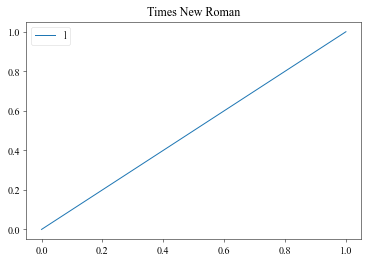

In [24]:
#%% Font size, etc.
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "font.size": 8,
    "lines.linewidth": 1,
    "lines.linestyle": '-',
    "axes.linewidth": 0.5,
    "xtick.major.size": 3,
    "xtick.major.width": 0.5,
    "ytick.major.size": 3,
    "ytick.major.width": 0.5,
    "patch.linewidth": 0.5,
    "grid.color" : 'k',
    "grid.linewidth":0.25
})
plt.plot([0,1],[0,1])
plt.legend('legend')
plt.title('Times New Roman')
# for Palatino and other serif fonts use:
#plt.rc('font', **font)


## $g^{(n)}$ distributions

[-0.06986847  0.          0.          0.          0.        ]
[-0.06257267  0.          0.          0.          0.        ]
[-0.06986847 -0.07362061  0.          0.          0.        ]
[-0.06257267 -0.06613137  0.          0.          0.        ]
[-0.06986847 -0.07362061 -0.06412465  0.          0.        ]
[-0.06257267 -0.06613137 -0.05594778  0.          0.        ]
[-0.06986847 -0.07362061 -0.06412465 -0.05085369  0.        ]
[-0.06257267 -0.06613137 -0.05594778 -0.04700309  0.        ]
[-6.98684720e-02 -7.36206148e-02 -6.41246468e-02 -5.08536919e-02
 -4.33680869e-19]
[-0.06257267 -0.06613137 -0.05594778 -0.04700309 -0.00824951]
(5,)
(5,)
[-0.02253544  0.          0.          0.          0.        ]
[-0.02697825  0.          0.          0.          0.        ]
[-0.02253544 -0.01884142  0.          0.          0.        ]
[-0.02697825 -0.02134911  0.          0.          0.        ]
[-0.02253544 -0.01884142 -0.02767849  0.          0.        ]
[-0.02697825 -0.02134911 -0.03103109  0

/tmp/ipykernel_2822839/922269091.py:136: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


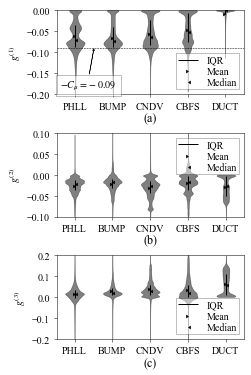

In [39]:
fig = plt.figure(figsize=(3.37,5.1),constrained_layout=True)
gs = fig.add_gridspec(3,1,width_ratios = [1],height_ratios = [1,1,1],hspace=0.,wspace=0.1)

PHLL = ['PHLL_case_0p5','PHLL_case_0p8','PHLL_case_1p0','PHLL_case_1p2','PHLL_case_1p5']
BUMP = ['BUMP_h20','BUMP_h26','BUMP_h31','BUMP_h38','BUMP_h42']
CNDV = ['CNDV_12600','CNDV_20580']
DUCT = ['DUCT_1100',
'DUCT_1150',
'DUCT_1250',
'DUCT_1300',
'DUCT_1350',
'DUCT_1400',
'DUCT_1500',
'DUCT_1600',
'DUCT_1800',
'DUCT_2000',
'DUCT_2205',
'DUCT_2400',
'DUCT_2600',
'DUCT_2900',
'DUCT_3200',
'DUCT_3500'
]
CBFS = ['CBFS_13700']

#ax2 = fig.add_subplot(gs[1, 0])
#cax = fig.add_subplot(gs[:, 1])
data_phll= df_pre[df_pre['Case'].isin(PHLL)]
data_bump= df_pre[df_pre['Case'].isin(BUMP)]
data_duct= df_pre[df_pre['Case'].isin(DUCT)]
data_cndv= df_pre[df_pre['Case'].isin(CNDV)]
data_cbfs= df_pre[df_pre['Case'].isin(CBFS)]

#data_phll = df['labels_b_11']
#data_bump = df['labels_b_11']

def plot_violins(axis, data):
    medians = np.zeros(len(data))
    means = np.zeros(len(data))

    qu1 = np.zeros(len(data))
    qu3 = np.zeros(len(data))
    for i in range(len(data)):
        qu1[i], medians[i], qu3[i] = np.percentile(data[i].values, [25, 50, 75], axis=0)
        means[i] = np.mean(data[i].values)
        print(medians)
        print(means)
    print(medians.shape)
    print(means.shape)
    inds = np.arange(1, len(medians) + 1)
    iqr = axis.vlines(inds, qu1, qu3, color='k',lw=1)
    means = axis.scatter(inds,means,facecolors='k',s=10,marker=5,linewidths=0.5)

    medians = axis.scatter(inds,medians,facecolors='k',s=10,linewidths=0.5,marker=4)

    #medians = axis.scatter(inds,medians,edgecolors='k',facecolors='none',s=20)

    violins = axis.violinplot(data,showmeans=False, showmedians=False, showextrema=False)
    for violin in violins['bodies']:
        violin.set_facecolor('k')
        violin.set_edgecolor('k')
        #violin.set_edgecolor('black')
        violin.set_alpha(.5)
    #violins['cmeans'].set_color('k')
    #print(len(data))

    
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])



#inds = ['x','y','z','a','h']
plot_violins(ax1,[data_phll['labels_g1_opt'],
                         data_bump['labels_g1_opt'],
                         data_cndv['labels_g1_opt'],
                         data_cbfs['labels_g1_opt'],
                         data_duct['labels_g1_opt']
                 ])
plot_violins(ax2,[data_phll['labels_g2_opt'],
                         data_bump['labels_g2_opt'],
                         data_cndv['labels_g2_opt'],
                         data_cbfs['labels_g2_opt'],
                         data_duct['labels_g2_opt']
                 ])
plot_violins(ax3,[data_phll['labels_g3_opt'],
                         data_bump['labels_g3_opt'],
                         data_cndv['labels_g3_opt'],
                         data_cbfs['labels_g3_opt'],
                         data_duct['labels_g3_opt']
                 ])
#ax1.set_title(r"(a) $||a_\theta||$",
  #            y=-0.3)

ax1.plot([0.5,5.5],[-0.09,-0.09],'k--',lw=0.5)
ax1.set_xlim(0.5,5.5)
t= ax1.annotate(r'$-C_\mu = -0.09$', xy=(1.5, -0.09),  xycoords='data',
            xytext=(22.5, -31), textcoords='offset points',
            arrowprops=dict(facecolor='black', width=0.25,shrink=0.02,headwidth=2,headlength=2),
            horizontalalignment='right', verticalalignment='top'
            )
t.set_bbox(dict(facecolor='white', alpha=.5, edgecolor='k'))

ax1.set_ylim([-0.2, 0])
ax2.set_ylim([-0.1,0.1])
ax3.set_ylim([-0.2,0.2])

ax1.set_ylabel(r'$g^{(1)}$')
ax2.set_ylabel(r'$g^{(2)}$')
ax3.set_ylabel(r'$g^{(3)}$')

ax1.set_title('(a)',y=-0.38)
ax2.set_title('(b)',y=-0.38)
ax3.set_title('(c)',y=-0.38)
"""
legend_elements = [Patch(facecolor='k', edgecolor='k',linewidth=line_width_edges, label=r"$\tau_{\theta xx}$"),
                   Patch(facecolor='tab:red', edgecolor='k',linewidth=line_width_edges, label=r"$\tau_{\theta xy}$"),
                   Patch(facecolor='tab:green', edgecolor='k',linewidth=line_width_edges, label=r"$\tau_{\theta yy}$")]
ax1.legend(#bbox_to_anchor=(0.55, 0.5),
           loc = 'upper left',
           ncol=2,columnspacing=0.5,handles=legend_elements, frameon=False,fancybox=False,edgecolor='k',fontsize=font_size_legend,labelspacing=.1)
"""
ax1.legend(['IQR','Mean','Median'],loc = 'lower right',fancybox=False,framealpha=.5,facecolor='w',edgecolor='k',labelspacing=0.1,borderpad=0.2)
ax2.legend(['IQR','Mean','Median'],loc = 'upper right',fancybox=False,framealpha=.5,facecolor='w',edgecolor='k',labelspacing=0.1,borderpad=0.2)
ax3.legend(['IQR','Mean','Median'],loc = 'lower right',fancybox=False,framealpha=.5,facecolor='w',edgecolor='k',labelspacing=0.1,borderpad=0.2)


for ax in [ax1,ax2,ax3]:
    ax.set_xticks([1,2,3,4,5])
    ax.set_xticklabels(['PHLL', 'BUMP', 'CNDV', 'CBFS', 'DUCT'])
#ax2.set_ylim([-0.5,0.5])
#ax3.set_ylim([-0.33333,0.66667])
#ax3.set_ylim([-0.33333,0.66667])

fig.tight_layout()
fig.savefig('plots/violin.pdf',dpi=500,bbox_inches='tight')

## 3D Scatter

/tmp/ipykernel_8745/743709104.py:68: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.savefig('plots/3d.png',dpi=500,bbox_inches='tight')


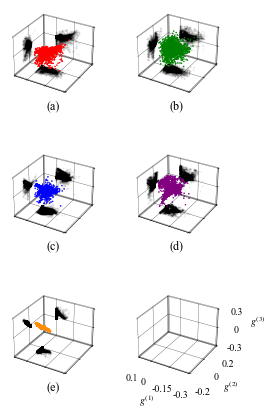

In [22]:

from matplotlib.lines import Line2D

colors = ['r','g','b','purple','darkorange','k']
caption = ['(a)','(b)','(c)','(d)','(e)','']
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(3.37,3.37*1.75),constrained_layout=True)
gs = fig.add_gridspec(3,2,hspace=0.,wspace=0.1
                     )


for index, case_type in enumerate(['PHLL','BUMP','CNDV','CBFS','DUCT','DUMMY']): 
    ax = fig.add_subplot(gs[index],projection='3d'
                        )
    df_case_type = df_pre[df_pre["Case"].str.contains(case_type)==True]
    if not case_type == 'DUMMY':
        df_sample = df_case_type.sample(n=5000,random_state=7)
        ax.scatter(df_sample['labels_g1_opt'],
                    df_sample['labels_g2_opt'],
                    df_sample['labels_g3_opt'],
                   s=1,c=colors[index],alpha=1,label=case_type,rasterized=True)
        ax.plot(df_sample['labels_g1_opt'], df_sample['labels_g3_opt'], 'ko', zdir='y', zs=0.2,alpha=0.05,markersize=1)
        ax.plot(df_sample['labels_g2_opt'], df_sample['labels_g3_opt'], 'ko', zdir='x', zs=0.1,alpha=0.05,markersize=1)
        ax.plot(df_sample['labels_g1_opt'], df_sample['labels_g2_opt'], 'ko', zdir='z', zs=-0.3,alpha=0.05,markersize=1)
        ax.set_xticks([0.1,0,-0.15,-0.3])
        ax.set_yticks([-0.2,0,0.2])
        ax.set_zticks([-0.3,0,0.3])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_zticklabels([])

    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)
    ax.set_xlim3d(0.1,-0.3)
    ax.set_ylim3d(-0.2,0.2)
    ax.set_zlim3d(-0.3,0.3)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis.pane.set_edgecolor('k')
    ax.yaxis.pane.set_edgecolor('k')
    ax.zaxis.pane.set_edgecolor('k')
    ax.grid(color='k',which='major')
    ax.set_title(caption[index],y=-0.2)
    if case_type == 'DUMMY':
        ax.tick_params(length=100)
        ax.set_xlabel(r'$g^{(1)}$')
        ax.set_ylabel(r'$g^{(2)}$')
        ax.set_zlabel(r'$g^{(3)}$')
        ax.set_xticks([0.1,0,-0.15,-0.3])
        ax.set_xticklabels(['0.1','0','-0.15','-0.3'])
        ax.set_yticks([-0.2,0,0.2])
        ax.set_yticklabels(['-0.2','0','0.2'])
        ax.set_zticks([-0.3,0,0.3])
        ax.set_zticklabels(['-0.3','0','0.3'])



#ax2.set_ylim([0,10])

#leg = ax.legend(#bbox_to_anchor=(.8, 1.2),
#    ncol=1,columnspacing=0.5,frameon=False,fancybox=False,edgecolor='k',fontsize=font_size_legend,labelspacing=.1)
#for lh in leg.legendHandles: 
#    lh.set_alpha(1)


#fig.tight_layout()
fig.savefig('plots/3d.png',dpi=500,bbox_inches='tight')
#plt.ion()
#plt.show()

## Visualizing $g^{(1)}$, $g^{(2)}$, and $g^{(3)}$ for several flows

-0.0971489
-0.5
0


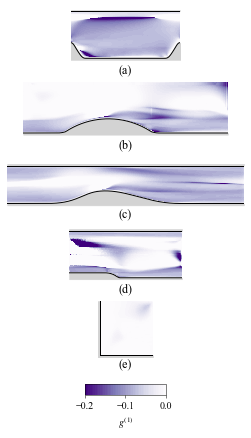

In [63]:
from matplotlib.lines import Line2D
from scipy.interpolate import griddata

# Edit these
cmap = 'Purples_r'
min_g = -0.2
max_g = 0.0
contour_variable = 'labels_g1_opt'
n_levels = 50

levels_g = np.linspace(min_g,max_g,n_levels)

caption = ['(a)','(b)','(c)','(d)','(e)','']
fig = plt.figure(figsize=(3.37,3.37*1.75),constrained_layout=True)
gs = fig.add_gridspec(6,1,hspace=0.,wspace=0.1
                     )
geom_0p5 = np.loadtxt(open(os.path.join('plots/geom_0p5.csv'), "rb"), 
                         delimiter=",",
                         skiprows=1)
geom_h42 = np.loadtxt(open(os.path.join('plots/geom_h42.csv'), "rb"), 
                         delimiter=",",
                         skiprows=1)
cells_h42 = np.loadtxt(open(os.path.join('plots/cells_h42.csv'), "rb"), 
                         delimiter=",",
                         skiprows=1)
geom_12600 = np.loadtxt(open(os.path.join('plots/geom_12600.csv'), "rb"), 
                         delimiter=",",
                         skiprows=1)
geom_cbfs = np.loadtxt(open(os.path.join('plots/geom_cbfs.csv'), "rb"), 
                         delimiter=",",
                         skiprows=1)

for index, case in enumerate(['PHLL_case_0p5','BUMP_h42','CNDV_12600','CBFS_13700','DUCT_1150']): 
    ax = fig.add_subplot(gs[index])
    df_case_type = df[df["Case"].str.contains(case)==True]
    if 'PHLL' in case:
        ax.set_aspect(1)

        contour = ax.tricontourf(df_case_type['komegasst_Cx'],
                       df_case_type['komegasst_Cy'],
                       df_case_type[contour_variable],
                          vmin = min_g,vmax = max_g,extend='both',levels=levels_g,cmap=cmap)
   
        ax.fill_between(geom_0p5[:,0],geom_0p5[:,1],y2=-0.1,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )
        y_top = 3.036
        ax.fill_between(geom_0p5[:,0],y_top*np.ones(geom_0p5[:,0].shape),y2=3.1036,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )

        ax.plot(geom_0p5[:,0],geom_0p5[:,1],'k-',zorder=101)
        ax.plot(geom_0p5[:,0],y_top*np.ones(geom_0p5[:,0].shape),'k-',zorder=101)
        ax.set_title(caption[index],y=-0.3)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
    if 'BUMP' in case:
        ax.set_aspect(1)

        values_h42 = griddata((df_case_type['komegasst_Cx'],
                              df_case_type['komegasst_Cy']),
                            df_case_type[contour_variable],
                              (cells_h42[:,0], cells_h42[:,1]),
                             method='nearest')
        contour = ax.tricontourf(cells_h42[:,0],
                       cells_h42[:,1],
                       values_h42,
                       vmin = min_g,vmax = max_g,extend='both',levels=levels_g,cmap=cmap)
   
        ax.fill_between(geom_h42[:,0],geom_h42[:,1],y2=-0.005,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )

        ax.plot(geom_h42[:,0],geom_h42[:,1],'k-',zorder=101)
        ax.set_title(caption[index],y=-0.3)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
        print(min(df_case_type['komegasst_Cx']))
            
    if 'CNDV' in case:
        ax.set_aspect(1)

        contour = ax.tricontourf(df_case_type['komegasst_Cx'],
                       df_case_type['komegasst_Cy'],
                       df_case_type[contour_variable],
                          vmin = min_g,vmax = max_g,extend='both',levels=levels_g,cmap=cmap)
   
        ax.fill_between(geom_12600[:,0],geom_12600[:,1],y2=-0.1,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )
        y_top = 2
        ax.fill_between(geom_12600[:,0],y_top*np.ones(geom_12600[:,0].shape),y2=2.1,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )

        ax.plot(geom_12600[:,0],geom_12600[:,1],'k-',zorder=101)
        ax.plot(geom_12600[:,0],y_top*np.ones(geom_12600[:,0].shape),'k-',zorder=101)
        ax.set_title(caption[index],y=-0.35)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
            
    if 'CBFS' in case:
        ax.set_aspect(1)

        contour = ax.tricontourf(df_case_type['komegasst_Cx'],
                       df_case_type['komegasst_Cy'],
                       df_case_type[contour_variable],
                          vmin = min_g,vmax = max_g,extend='both',levels=levels_g,cmap=cmap)
   
        ax.fill_between(geom_cbfs[:,0],geom_cbfs[:,1],y2=-0.3,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )
        y_top = 9.47955
        ax.fill_between(geom_cbfs[:,0],y_top*np.ones(geom_cbfs[:,0].shape),y2=9.8,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )

        ax.plot(geom_cbfs[:,0],geom_cbfs[:,1],'k-',zorder=101)
        ax.plot(geom_cbfs[:,0],y_top*np.ones(geom_cbfs[:,0].shape),'k-',zorder=101)
        ax.set_title(caption[index],y=-0.3)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
            
    if 'DUCT' in case:
        ax.set_aspect(1)
        #print(df_case_type['komegasst_Cx'])
        #print(df_case_type[contour_variable])
        contour = ax.tricontourf(df_case_type['komegasst_Cy'],
                       df_case_type['komegasst_Cz'],
                       df_case_type[contour_variable],
                          vmin = min_g,vmax = max_g,extend='both',levels=levels_g,cmap=cmap)
        duct_min = -0.5
        duct_max = 0
        duct_step = np.linspace(duct_min,duct_max,100)
        duct_same = duct_min*np.ones(100)
        print(duct_min)
        print(duct_max)
        ax.set_xlim([-0.52,0])
        ax.set_ylim([-0.52,0])
        
        ax.fill_between([-0.6,-0.5],[-0.6, -0.6],y2=0,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100)
        ax.fill_between([-0.6,0],[-0.6, -0.6],y2=-0.5,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100)
        ax.plot(duct_step,-duct_same,'k-',zorder=101)
        ax.plot(duct_step,duct_same,'k-',zorder=101)
        ax.plot(-duct_same,duct_step,'k-',zorder=101)
        ax.plot(duct_same,duct_step,'k-',zorder=101)
        


        ax.set_title(caption[index],y=-0.3)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
        

cb_ax = fig.add_axes([.3333,0.08,.333,.025])
cbar1=fig.colorbar(contour, cax=cb_ax,orientation = 'horizontal',
     shrink=.1, pad = 0.1,
     ticks=[-0.2, -0.1, 0], extend='neither',extendfrac=0,#fraction=0.01
     )
cb_ax.set_xlabel(r'$g^{(1)}$')

fig.savefig('plots/contour_g1.pdf',dpi=500,bbox_inches='tight')


-0.0971489
-0.5
0


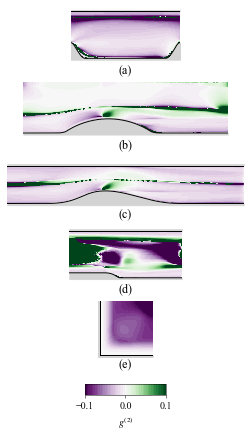

In [64]:
from matplotlib.lines import Line2D
from scipy.interpolate import griddata

# Edit these
cmap = 'PRGn'
min_g = -0.1
max_g = 0.1
contour_variable = 'labels_g2_opt'
n_levels = 50

levels_g = np.linspace(min_g,max_g,n_levels)

caption = ['(a)','(b)','(c)','(d)','(e)','']
fig = plt.figure(figsize=(3.37,3.37*1.75),constrained_layout=True)
gs = fig.add_gridspec(6,1,hspace=0.,wspace=0.1
                     )
geom_0p5 = np.loadtxt(open(os.path.join('plots/geom_0p5.csv'), "rb"), 
                         delimiter=",",
                         skiprows=1)
geom_h42 = np.loadtxt(open(os.path.join('plots/geom_h42.csv'), "rb"), 
                         delimiter=",",
                         skiprows=1)
cells_h42 = np.loadtxt(open(os.path.join('plots/cells_h42.csv'), "rb"), 
                         delimiter=",",
                         skiprows=1)
geom_12600 = np.loadtxt(open(os.path.join('plots/geom_12600.csv'), "rb"), 
                         delimiter=",",
                         skiprows=1)
geom_cbfs = np.loadtxt(open(os.path.join('plots/geom_cbfs.csv'), "rb"), 
                         delimiter=",",
                         skiprows=1)

for index, case in enumerate(['PHLL_case_0p5','BUMP_h42','CNDV_12600','CBFS_13700','DUCT_1150']): 
    ax = fig.add_subplot(gs[index])
    df_case_type = df[df["Case"].str.contains(case)==True]
    if 'PHLL' in case:
        ax.set_aspect(1)

        contour = ax.tricontourf(df_case_type['komegasst_Cx'],
                       df_case_type['komegasst_Cy'],
                       df_case_type[contour_variable],
                          vmin = min_g,vmax = max_g,extend='both',levels=levels_g,cmap=cmap)
   
        ax.fill_between(geom_0p5[:,0],geom_0p5[:,1],y2=-0.1,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )
        y_top = 3.036
        ax.fill_between(geom_0p5[:,0],y_top*np.ones(geom_0p5[:,0].shape),y2=3.1036,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )

        ax.plot(geom_0p5[:,0],geom_0p5[:,1],'k-',zorder=101)
        ax.plot(geom_0p5[:,0],y_top*np.ones(geom_0p5[:,0].shape),'k-',zorder=101)
        ax.set_title(caption[index],y=-0.3)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
    if 'BUMP' in case:
        ax.set_aspect(1)

        values_h42 = griddata((df_case_type['komegasst_Cx'],
                              df_case_type['komegasst_Cy']),
                            df_case_type[contour_variable],
                              (cells_h42[:,0], cells_h42[:,1]),
                             method='nearest')
        contour = ax.tricontourf(cells_h42[:,0],
                       cells_h42[:,1],
                       values_h42,
                       vmin = min_g,vmax = max_g,extend='both',levels=levels_g,cmap=cmap)
   
        ax.fill_between(geom_h42[:,0],geom_h42[:,1],y2=-0.005,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )


        ax.plot(geom_h42[:,0],geom_h42[:,1],'k-',zorder=101)
        ax.set_title(caption[index],y=-0.3)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
        print(min(df_case_type['komegasst_Cx']))
            
    if 'CNDV' in case:
        ax.set_aspect(1)

        contour = ax.tricontourf(df_case_type['komegasst_Cx'],
                       df_case_type['komegasst_Cy'],
                       df_case_type[contour_variable],
                          vmin = min_g,vmax = max_g,extend='both',levels=levels_g,cmap=cmap)
   
        ax.fill_between(geom_12600[:,0],geom_12600[:,1],y2=-0.1,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )
        y_top = 2
        ax.fill_between(geom_12600[:,0],y_top*np.ones(geom_12600[:,0].shape),y2=2.1,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )

        ax.plot(geom_12600[:,0],geom_12600[:,1],'k-',zorder=101)
        ax.plot(geom_12600[:,0],y_top*np.ones(geom_12600[:,0].shape),'k-',zorder=101)
        ax.set_title(caption[index],y=-0.35)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
            
    if 'CBFS' in case:
        ax.set_aspect(1)

        contour = ax.tricontourf(df_case_type['komegasst_Cx'],
                       df_case_type['komegasst_Cy'],
                       df_case_type[contour_variable],
                          vmin = min_g,vmax = max_g,extend='both',levels=levels_g,cmap=cmap)
   
        ax.fill_between(geom_cbfs[:,0],geom_cbfs[:,1],y2=-0.3,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )
        y_top = 9.47955
        ax.fill_between(geom_cbfs[:,0],y_top*np.ones(geom_cbfs[:,0].shape),y2=9.8,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )

        ax.plot(geom_cbfs[:,0],geom_cbfs[:,1],'k-',zorder=101)
        ax.plot(geom_cbfs[:,0],y_top*np.ones(geom_cbfs[:,0].shape),'k-',zorder=101)
        ax.set_title(caption[index],y=-0.3)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
            
    if 'DUCT' in case:
        ax.set_aspect(1)
        #print(df_case_type['komegasst_Cx'])
        #print(df_case_type[contour_variable])
        contour = ax.tricontourf(df_case_type['komegasst_Cy'],
                       df_case_type['komegasst_Cz'],
                       df_case_type[contour_variable],
                          vmin = min_g,vmax = max_g,extend='both',levels=levels_g,cmap=cmap)
        duct_min = -0.5
        duct_max = 0
        duct_step = np.linspace(duct_min,duct_max,100)
        duct_same = duct_min*np.ones(100)
        print(duct_min)
        print(duct_max)
        ax.set_xlim([-0.52,0])
        ax.set_ylim([-0.52,0])
        
        ax.fill_between([-0.6,-0.5],[-0.6, -0.6],y2=0,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100)
        ax.fill_between([-0.6,0],[-0.6, -0.6],y2=-0.5,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100)
        ax.plot(duct_step,-duct_same,'k-',zorder=101)
        ax.plot(duct_step,duct_same,'k-',zorder=101)
        ax.plot(-duct_same,duct_step,'k-',zorder=101)
        ax.plot(duct_same,duct_step,'k-',zorder=101)
        


        ax.set_title(caption[index],y=-0.3)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
        

cb_ax = fig.add_axes([.3333,0.08,.333,.025])
cbar1=fig.colorbar(contour, cax=cb_ax,orientation = 'horizontal',
     shrink=.1, pad = 0.1,
     ticks=[-0.1, 0, 0.1], extend='neither',extendfrac=0,#fraction=0.01
     )
cb_ax.set_xlabel(r'$g^{(2)}$')

fig.savefig('plots/contour_g2.pdf',dpi=500,bbox_inches='tight')


-0.0971489
-0.5
0


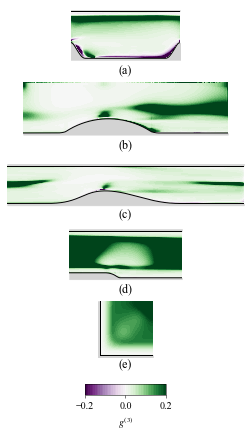

In [ ]:
from matplotlib.lines import Line2D
from scipy.interpolate import griddata

# Edit these
cmap = 'PRGn'
min_g = -0.2
max_g = 0.2
contour_variable = 'labels_g3_opt'
n_levels = 50

levels_g = np.linspace(min_g,max_g,n_levels)

caption = ['(a)','(b)','(c)','(d)','(e)','']
fig = plt.figure(figsize=(3.37,3.37*1.75),constrained_layout=True)
gs = fig.add_gridspec(6,1,hspace=0.,wspace=0.1
                     )
geom_0p5 = np.loadtxt(open(os.path.join('plots/geom_0p5.csv'), "rb"), 
                         delimiter=",",
                         skiprows=1)
geom_h42 = np.loadtxt(open(os.path.join('plots/geom_h42.csv'), "rb"), 
                         delimiter=",",
                         skiprows=1)
cells_h42 = np.loadtxt(open(os.path.join('plots/cells_h42.csv'), "rb"), 
                         delimiter=",",
                         skiprows=1)
geom_12600 = np.loadtxt(open(os.path.join('plots/geom_12600.csv'), "rb"), 
                         delimiter=",",
                         skiprows=1)
geom_cbfs = np.loadtxt(open(os.path.join('plots/geom_cbfs.csv'), "rb"), 
                         delimiter=",",
                         skiprows=1)

for index, case in enumerate(['PHLL_case_0p5','BUMP_h42','CNDV_12600','CBFS_13700','DUCT_1150']): 
    ax = fig.add_subplot(gs[index])
    df_case_type = df[df["Case"].str.contains(case)==True]
    if 'PHLL' in case:
        ax.set_aspect(1)

        contour = ax.tricontourf(df_case_type['komegasst_Cx'],
                       df_case_type['komegasst_Cy'],
                       df_case_type[contour_variable],
                          vmin = min_g,vmax = max_g,extend='both',levels=levels_g,cmap=cmap)
   
        ax.fill_between(geom_0p5[:,0],geom_0p5[:,1],y2=-0.1,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )
        y_top = 3.036
        ax.fill_between(geom_0p5[:,0],y_top*np.ones(geom_0p5[:,0].shape),y2=3.1036,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )

        ax.plot(geom_0p5[:,0],geom_0p5[:,1],'k-',zorder=101)
        ax.plot(geom_0p5[:,0],y_top*np.ones(geom_0p5[:,0].shape),'k-',zorder=101)
        ax.set_title(caption[index],y=-0.3)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
    if 'BUMP' in case:
        ax.set_aspect(1)

        values_h42 = griddata((df_case_type['komegasst_Cx'],
                              df_case_type['komegasst_Cy']),
                            df_case_type[contour_variable],
                              (cells_h42[:,0], cells_h42[:,1]),
                             method='nearest')
        contour = ax.tricontourf(cells_h42[:,0],
                       cells_h42[:,1],
                       values_h42,
                       vmin = min_g,vmax = max_g,extend='both',levels=levels_g,cmap=cmap)
   
        ax.fill_between(geom_h42[:,0],geom_h42[:,1],y2=-0.005,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )


        ax.plot(geom_h42[:,0],geom_h42[:,1],'k-',zorder=101)
        ax.set_title(caption[index],y=-0.3)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
        print(min(df_case_type['komegasst_Cx']))
            
    if 'CNDV' in case:
        ax.set_aspect(1)

        contour = ax.tricontourf(df_case_type['komegasst_Cx'],
                       df_case_type['komegasst_Cy'],
                       df_case_type[contour_variable],
                          vmin = min_g,vmax = max_g,extend='both',levels=levels_g,cmap=cmap)
   
        ax.fill_between(geom_12600[:,0],geom_12600[:,1],y2=-0.1,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )
        y_top = 2
        ax.fill_between(geom_12600[:,0],y_top*np.ones(geom_12600[:,0].shape),y2=2.1,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )

        ax.plot(geom_12600[:,0],geom_12600[:,1],'k-',zorder=101)
        ax.plot(geom_12600[:,0],y_top*np.ones(geom_12600[:,0].shape),'k-',zorder=101)
        ax.set_title(caption[index],y=-0.35)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
            
    if 'CBFS' in case:
        ax.set_aspect(1)

        contour = ax.tricontourf(df_case_type['komegasst_Cx'],
                       df_case_type['komegasst_Cy'],
                       df_case_type[contour_variable],
                          vmin = min_g,vmax = max_g,extend='both',levels=levels_g,cmap=cmap)
   
        ax.fill_between(geom_cbfs[:,0],geom_cbfs[:,1],y2=-0.3,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )
        y_top = 9.47955
        ax.fill_between(geom_cbfs[:,0],y_top*np.ones(geom_cbfs[:,0].shape),y2=9.8,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )

        ax.plot(geom_cbfs[:,0],geom_cbfs[:,1],'k-',zorder=101)
        ax.plot(geom_cbfs[:,0],y_top*np.ones(geom_cbfs[:,0].shape),'k-',zorder=101)
        ax.set_title(caption[index],y=-0.3)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
            
    if 'DUCT' in case:
        ax.set_aspect(1)
        #print(df_case_type['komegasst_Cx'])
        #print(df_case_type[contour_variable])
        contour = ax.tricontourf(df_case_type['komegasst_Cy'],
                       df_case_type['komegasst_Cz'],
                       df_case_type[contour_variable],
                          vmin = min_g,vmax = max_g,extend='both',levels=levels_g,cmap=cmap)
        duct_min = -0.5
        duct_max = 0
        duct_step = np.linspace(duct_min,duct_max,100)
        duct_same = duct_min*np.ones(100)
        print(duct_min)
        print(duct_max)
        ax.set_xlim([-0.52,0])
        ax.set_ylim([-0.52,0])
        
        ax.fill_between([-0.6,-0.5],[-0.6, -0.6],y2=0,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100)
        ax.fill_between([-0.6,0],[-0.6, -0.6],y2=-0.5,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100)
        ax.plot(duct_step,-duct_same,'k-',zorder=101)
        ax.plot(duct_step,duct_same,'k-',zorder=101)
        ax.plot(-duct_same,duct_step,'k-',zorder=101)
        ax.plot(duct_same,duct_step,'k-',zorder=101)
        


        ax.set_title(caption[index],y=-0.3)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
        

cb_ax = fig.add_axes([.3333,0.08,.333,.025])
cbar1=fig.colorbar(contour, cax=cb_ax,orientation = 'horizontal',
     shrink=.1, pad = 0.1,
     ticks=[-0.2, 0, 0.2], extend='neither',extendfrac=0,#fraction=0.01
     )
cb_ax.set_xlabel(r'$g^{(3)}$')

fig.savefig('plots/contour_g3.pdf',dpi=500,bbox_inches='tight')


## Velocity field contour

/tmp/ipykernel_2822839/135247298.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_case_type['komegasst_Umag'] = (df_case_type['komegasst_Ux']**2 + df_case_type['komegasst_Uy']**2 +df_case_type['komegasst_Uz']**2)**0.5
/tmp/ipykernel_2822839/135247298.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_case_type['komegasst_Umag'] = (df_case_type['komegasst_Ux']**2 + df_case_type['komegasst_Uy']**2 +df_case_type['komegasst_Uz']**2)**0.5


-0.0971489


/tmp/ipykernel_2822839/135247298.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_case_type['komegasst_Umag'] = (df_case_type['komegasst_Ux']**2 + df_case_type['komegasst_Uy']**2 +df_case_type['komegasst_Uz']**2)**0.5
/tmp/ipykernel_2822839/135247298.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_case_type['komegasst_Umag'] = (df_case_type['komegasst_Ux']**2 + df_case_type['komegasst_Uy']**2 +df_case_type['komegasst_Uz']**2)**0.5
/tmp/ipykernel_2822839/135247298.py:37: SettingWithCopyWarning

-0.5
0


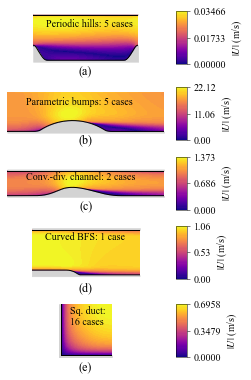

In [67]:
from matplotlib.lines import Line2D
from scipy.interpolate import griddata

# Edit these
cmap = 'plasma'
min_g = -0.2
max_g = 0.2
contour_variable = 'komegasst_Umag'
n_levels = 50

levels_g = np.linspace(min_g,max_g,n_levels)

caption = ['(a)','(b)','(c)','(d)','(e)']
fig = plt.figure(figsize=(3.37,3.37*1.75),constrained_layout=True)
gs = fig.add_gridspec(6,2,hspace=0.,wspace=0.1,width_ratios=[1, .07]
                     )
geom_0p5 = np.loadtxt(open(os.path.join('plots/geom_0p5.csv'), "rb"), 
                         delimiter=",",
                         skiprows=1)
geom_h42 = np.loadtxt(open(os.path.join('plots/geom_h42.csv'), "rb"), 
                         delimiter=",",
                         skiprows=1)
cells_h42 = np.loadtxt(open(os.path.join('plots/cells_h42.csv'), "rb"), 
                         delimiter=",",
                         skiprows=1)
geom_12600 = np.loadtxt(open(os.path.join('plots/geom_12600.csv'), "rb"), 
                         delimiter=",",
                         skiprows=1)
geom_cbfs = np.loadtxt(open(os.path.join('plots/geom_cbfs.csv'), "rb"), 
                         delimiter=",",
                         skiprows=1)

for index, case in enumerate(['PHLL_case_0p5','BUMP_h42','CNDV_12600','CBFS_13700','DUCT_1150']): 
    
    ax = fig.add_subplot(gs[index,0])
    df_case_type = df[df["Case"].str.contains(case)==True]
    df_case_type['komegasst_Umag'] = (df_case_type['komegasst_Ux']**2 + df_case_type['komegasst_Uy']**2 +df_case_type['komegasst_Uz']**2)**0.5
    levels = np.linspace(min(df_case_type[contour_variable]),max(df_case_type[contour_variable]),n_levels)
    if 'PHLL' in case:
        ax.set_aspect(1)

        contour = ax.tricontourf(df_case_type['komegasst_Cx'],
                       df_case_type['komegasst_Cy'],
                       df_case_type[contour_variable],
                          extend='both',cmap=cmap,levels=levels)
   
        ax.fill_between(geom_0p5[:,0],geom_0p5[:,1],y2=-0.1,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )
        y_top = 3.036
        ax.fill_between(geom_0p5[:,0],y_top*np.ones(geom_0p5[:,0].shape),y2=3.1036,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )

        ax.plot(geom_0p5[:,0],geom_0p5[:,1],'k-',zorder=101)
        ax.plot(geom_0p5[:,0],y_top*np.ones(geom_0p5[:,0].shape),'k-',zorder=101)
        ax.set_title(caption[index],y=-0.3)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
            
        cax = fig.add_subplot(gs[index,1])
        cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
             shrink=.1, pad = 0.1,
             ticks=[0,
                    (max(df_case_type[contour_variable]))/2,
                    max(df_case_type[contour_variable])], extend='neither',extendfrac=0,#fraction=0.01
             )
        cax.set_ylabel(r'$|U|$ (m/s)')
        ax.annotate('Periodic hills: 5 cases',(0.12,0.7),xycoords='axes fraction')
        
    if 'BUMP' in case:
        ax.set_aspect(1)

        values_h42 = griddata((df_case_type['komegasst_Cx'],
                              df_case_type['komegasst_Cy']),
                            df_case_type[contour_variable],
                              (cells_h42[:,0], cells_h42[:,1]),
                             method='nearest')
        contour = ax.tricontourf(cells_h42[:,0],
                       cells_h42[:,1],
                       values_h42,
                       extend='both',cmap=cmap,levels=levels)
   
        ax.fill_between(geom_h42[:,0],geom_h42[:,1],y2=-0.005,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )


        ax.plot(geom_h42[:,0],geom_h42[:,1],'k-',zorder=101)
        ax.set_title(caption[index],y=-0.35)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
        print(min(df_case_type['komegasst_Cx']))
        
        cax = fig.add_subplot(gs[index,1])
        cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
             shrink=.1, pad = 0.1,
             ticks=[0,
                    (max(df_case_type[contour_variable]))/2,
                    max(df_case_type[contour_variable])], extend='neither',extendfrac=0,#fraction=0.01
             )
        cax.set_ylabel(r'$|U|$ (m/s)')
        ax.annotate('Parametric bumps: 5 cases',(0.12,0.7),xycoords='axes fraction')

    if 'CNDV' in case:
        ax.set_aspect(1)

        contour = ax.tricontourf(df_case_type['komegasst_Cx'],
                       df_case_type['komegasst_Cy'],
                       df_case_type[contour_variable],
                          extend='both',cmap=cmap,levels=levels)
   
        ax.fill_between(geom_12600[:,0],geom_12600[:,1],y2=-0.1,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )
        y_top = 2
        ax.fill_between(geom_12600[:,0],y_top*np.ones(geom_12600[:,0].shape),y2=2.1,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )

        ax.plot(geom_12600[:,0],geom_12600[:,1],'k-',zorder=101)
        ax.plot(geom_12600[:,0],y_top*np.ones(geom_12600[:,0].shape),'k-',zorder=101)
        ax.set_title(caption[index],y=-0.55)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
            
        cax = fig.add_subplot(gs[index,1])
        cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
             shrink=.1, pad = 0.1,
             ticks=[0,
                    (max(df_case_type[contour_variable]))/2,
                    max(df_case_type[contour_variable])], extend='neither',extendfrac=0,#fraction=0.01
             )
        cax.set_ylabel(r'$|U|$ (m/s)')
        ax.annotate('Conv.-div. channel: 2 cases',(0.12,0.6),xycoords='axes fraction')

    if 'CBFS' in case:
        ax.set_aspect(1)

        contour = ax.tricontourf(df_case_type['komegasst_Cx'],
                       df_case_type['komegasst_Cy'],
                       df_case_type[contour_variable],
                          extend='both',cmap=cmap,levels=levels)
   
        ax.fill_between(geom_cbfs[:,0],geom_cbfs[:,1],y2=-0.3,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )
        y_top = 9.47955
        ax.fill_between(geom_cbfs[:,0],y_top*np.ones(geom_cbfs[:,0].shape),y2=9.8,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100
                         )

        ax.plot(geom_cbfs[:,0],geom_cbfs[:,1],'k-',zorder=101)
        ax.plot(geom_cbfs[:,0],y_top*np.ones(geom_cbfs[:,0].shape),'k-',zorder=101)
        ax.set_title(caption[index],y=-0.35)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)

        cax = fig.add_subplot(gs[index,1])
        cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
             shrink=.1, pad = 0.1,
             ticks=[0,
                    (max(df_case_type[contour_variable]))/2,
                    max(df_case_type[contour_variable])], extend='neither',extendfrac=0,#fraction=0.01
             )
        cax.set_ylabel(r'$|U|$ (m/s)')
        ax.annotate('Curved BFS: 1 case',(0.12,0.73),xycoords='axes fraction')

    if 'DUCT' in case:
        ax.set_aspect(1)
        #print(df_case_type['komegasst_Cx'])
        #print(df_case_type[contour_variable])
        contour = ax.tricontourf(df_case_type['komegasst_Cy'],
                       df_case_type['komegasst_Cz'],
                       df_case_type[contour_variable],
                          extend='both',cmap=cmap,levels=levels)
        duct_min = -0.5
        duct_max = 0
        duct_step = np.linspace(duct_min,duct_max,100)
        duct_same = duct_min*np.ones(100)
        print(duct_min)
        print(duct_max)
        ax.set_xlim([-0.52,0])
        ax.set_ylim([-0.52,0])
        
        ax.fill_between([-0.6,-0.5],[-0.6, -0.6],y2=0,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100)
        ax.fill_between([-0.6,0],[-0.6, -0.6],y2=-0.5,
                         color='lightgrey',
                         linestyle='-',label=None,zorder=100)
        ax.plot(duct_step,-duct_same,'k-',zorder=101)
        ax.plot(duct_step,duct_same,'k-',zorder=101)
        ax.plot(-duct_same,duct_step,'k-',zorder=101)
        ax.plot(duct_same,duct_step,'k-',zorder=101)
        


        ax.set_title(caption[index],y=-0.35)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
        cax = fig.add_subplot(gs[index,1])
        cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
             shrink=.1, pad = 0.1,
             ticks=[0,
                    (max(df_case_type[contour_variable]))/2,
                    max(df_case_type[contour_variable])], extend='neither',extendfrac=0,#fraction=0.01
             )
        cax.set_ylabel(r'$|U|$ (m/s)')
        ax.annotate('Sq. duct:\n16 cases',(0.2,0.6),xycoords='axes fraction')

        
fig.savefig('plots/contour_U.pdf',dpi=500,bbox_inches='tight')


## Prediction contours

In [163]:
# Convenience functions
def plotgeom_1p2(ax):
    geom_1p2 = np.loadtxt(open(os.path.join('plots/geom_1p2.csv'), "rb"), 
                         delimiter=",",
                         skiprows=1)
    ax.fill_between(geom_1p2[:,0],geom_1p2[:,1],y2=-0.1,
                     color='lightgrey',
                     linestyle='-',label=None,zorder=100
                     )
    y_top = 3.036
    ax.fill_between(geom_1p2[:,0],y_top*np.ones(geom_1p2[:,0].shape),y2=3.1036,
                     color='lightgrey',
                     linestyle='-',label=None,zorder=100
                     )

    ax.plot(geom_1p2[:,0],geom_1p2[:,1],'k-',zorder=101)
    ax.plot(geom_1p2[:,0],y_top*np.ones(geom_1p2[:,0].shape),'k-',zorder=101)

def plotgeom_h38(ax):
    geom_h38 = np.loadtxt(open(os.path.join('plots/geom_h38.csv'), "rb"), 
                             delimiter=",",
                             skiprows=1)
    ax.fill_between(geom_h38[:,0],geom_h38[:,1],y2=-0.005,
                     color='lightgrey',
                     linestyle='-',label=None,zorder=100
                     )
    ax.plot(geom_h38[:,0],geom_h38[:,1],'k-',zorder=101)

def plotgeom_2400(ax):
    duct_min = -0.5
    duct_max = 0
    duct_step = np.linspace(duct_min,duct_max,100)
    duct_same = duct_min*np.ones(100)
    ax.set_xlim([-0.52,0])
    ax.set_ylim([-0.52,0])

    ax.fill_between([-0.6,-0.5],[-0.6, -0.6],y2=0,
                     color='lightgrey',
                     linestyle='-',label=None,zorder=100)
    ax.fill_between([-0.6,0],[-0.6, -0.6],y2=-0.5,
                     color='lightgrey',
                     linestyle='-',label=None,zorder=100)
    ax.plot(duct_step,-duct_same,'k-',zorder=101)
    ax.plot(duct_step,duct_same,'k-',zorder=101)
    ax.plot(-duct_same,duct_step,'k-',zorder=101)
    ax.plot(duct_same,duct_step,'k-',zorder=101)

def plotgeom_20580(ax):
    geom_20580 = np.loadtxt(open(os.path.join('plots/geom_20580.csv'), "rb"), 
                             delimiter=",",
                             skiprows=1)
    
    ax.fill_between(geom_20580[:,0],geom_20580[:,1],y2=-0.1,
                     color='lightgrey',
                     linestyle='-',label=None,zorder=100
                     )
    y_top = 2
    ax.fill_between(geom_20580[:,0],y_top*np.ones(geom_20580[:,0].shape),y2=2.1,
                     color='lightgrey',
                     linestyle='-',label=None,zorder=100
                     )

    ax.plot(geom_20580[:,0],geom_20580[:,1],'k-',zorder=101)
    ax.plot(geom_20580[:,0],y_top*np.ones(geom_20580[:,0].shape),'k-',zorder=101)

def plotgeom_13700(ax):
    geom_cbfs = np.loadtxt(open(os.path.join('plots/geom_cbfs.csv'), "rb"), 
                             delimiter=",",
                             skiprows=1)
    ax.fill_between(geom_cbfs[:,0],geom_cbfs[:,1],y2=-0.3,
                     color='lightgrey',
                     linestyle='-',label=None,zorder=100
                     )
    y_top = 9.47955
    ax.fill_between(geom_cbfs[:,0],y_top*np.ones(geom_cbfs[:,0].shape),y2=9.8,
                     color='lightgrey',
                     linestyle='-',label=None,zorder=100
                     )

    ax.plot(geom_cbfs[:,0],geom_cbfs[:,1],'k-',zorder=101)
    ax.plot(geom_cbfs[:,0],y_top*np.ones(geom_cbfs[:,0].shape),'k-',zorder=101)

### $g^{(1)}$ contours for six models

14751
0 0
0 1
1 0
1 1
2 0
2 1


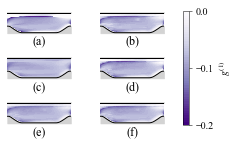

In [75]:
from matplotlib.lines import Line2D
from scipy.interpolate import griddata
from functools import partial
# Import math library
import math
df_full = df[df["Case"].str.contains('PHLL_case_1p2')==True]
print(len(df_full))
select_feature_set = partial(fulldf_select_case_x_y,df = df_full, 
                            case_prefix_list = ['PHLL',],
                            label_name_list = labels,
                                         shuffle=False)

x_test, y_test, cases_list = select_feature_set(feature_name_list = featuresall)
g1_pred_rf = rf_full.predict(x_test)[:,0]
g1_pred_nn = nn_full.predict(x_test)[:,0]
g1_pred_xgb = xgb_full.predict(x_test)[:,0]
g1_pred_uniform =  (weight_nn*nn_full.predict(x_test)+weight_rf*rf_full.predict(x_test)+weight_xgb*xgb_full.predict(x_test))[:,0]
g1_pred_weighted =  (weight_cv_nn*nn_full.predict(x_test)+weight_cv_rf*rf_full.predict(x_test)+weight_cv_xgb*xgb_full.predict(x_test))[:,0]
g1_true = y_test['labels_g1_opt']

# Edit these
cmap_dict = {'g1':'Purples_r',
             'g2':'PRGn',
             'g3':'PRGn'}

min_g_dict = {'g1':-0.2,
             'g2':-0.1,
             'g3':-0.2}
max_g_dict = {'g1':0,
             'g2':0.1,
             'g3':0.2}
n_levels = 50


caption = ['(a)','(b)','(c)','(d)','(e)','(f)']
field_type = ['g1','g1','g1','g1','g1','g1',]
fig = plt.figure(figsize=(3.37,1.85),constrained_layout=True)
gs = fig.add_gridspec(3,3,hspace=0.0,wspace=0.1,width_ratios=[1, 1, 0.07]
                     )

for index, field_to_plot in enumerate([g1_true,g1_pred_rf,g1_pred_nn,g1_pred_xgb,g1_pred_uniform,g1_pred_weighted]): 
    row = math.floor(index /2)
    col = 1 if index % 2 else 0
    print(row, col)
    ax = fig.add_subplot(gs[row, col])
    ax.set_aspect(1)
    cmap = cmap_dict[field_type[index]]
    min_g = min_g_dict[field_type[index]]
    max_g = max_g_dict[field_type[index]]

    levels = np.linspace(min_g,max_g,n_levels)
    contour = ax.tricontourf(df_full['komegasst_Cx'],
                   df_full['komegasst_Cy'],
                   field_to_plot,
                      extend='both',cmap=cmap,levels=levels,vmin=min_g,vmax=max_g)
    plotgeom_1p2(ax)

    ax.set_title(caption[index],y=-0.7)
    ax.axis('off')
    for c in contour.collections:
        c.set_rasterized(True)

cax = fig.add_subplot(gs[:,2])
cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
     #shrink=.1, pad = 0.04,
     ticks=[-0.2,
            -0.1,
            0], extend='neither',extendfrac=0,fraction=0.01
     )
cax.set_ylabel(r'$g^{(1)}$')
fig.savefig('plots/trainFULL_testPHLL_g1_allmodels.pdf',dpi=500,bbox_inches='tight')


70967
0 0
0 1
1 0
1 1
2 0
2 1


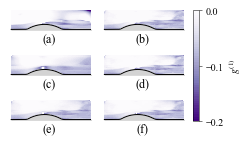

In [53]:
from matplotlib.lines import Line2D
from scipy.interpolate import griddata
from functools import partial

df_full = df[df["Case"].str.contains('BUMP_h38')==True]
print(len(df_full))
select_feature_set = partial(fulldf_select_case_x_y,df = df_full, 
                            case_prefix_list = ['BUMP',],
                            label_name_list = labels,
                                         shuffle=False)

x_test, y_test, cases_list = select_feature_set(feature_name_list = featuresall)
g1_pred_rf = rf_full.predict(x_test)[:,0]
g1_pred_nn = nn_full.predict(x_test)[:,0]
g1_pred_xgb = xgb_full.predict(x_test)[:,0]
g1_pred_uniform =  (weight_nn*nn_full.predict(x_test)+weight_rf*rf_full.predict(x_test)+weight_xgb*xgb_full.predict(x_test))[:,0]
g1_pred_weighted =  (weight_cv_nn*nn_full.predict(x_test)+weight_cv_rf*rf_full.predict(x_test)+weight_cv_xgb*xgb_full.predict(x_test))[:,0]
g1_true = y_test['labels_g1_opt']

# Edit these
cmap_dict = {'g1':'Purples_r',
             'g2':'PRGn',
             'g3':'PRGn'}

min_g_dict = {'g1':-0.2,
             'g2':-0.1,
             'g3':-0.2}
max_g_dict = {'g1':0,
             'g2':0.1,
             'g3':0.2}
n_levels = 50


caption = ['(a)','(b)','(c)','(d)','(e)','(f)']
field_type = ['g1','g1','g1','g1','g1','g1',]
fig = plt.figure(figsize=(3.37,1.85),constrained_layout=True)
gs = fig.add_gridspec(3,3,hspace=0.0,wspace=0.1,width_ratios=[1, 1, 0.07]
                     )

for index, field_to_plot in enumerate([g1_true,g1_pred_rf,g1_pred_nn,g1_pred_xgb,g1_pred_uniform,g1_pred_weighted]): 
    row = math.floor(index /2)
    col = 1 if index % 2 else 0
    print(row, col)
    ax = fig.add_subplot(gs[row, col])
    ax.set_aspect(1)
    cmap = cmap_dict[field_type[index]]
    min_g = min_g_dict[field_type[index]]
    max_g = max_g_dict[field_type[index]]

    levels = np.linspace(min_g,max_g,n_levels)

    contour = ax.tricontourf(df_full['komegasst_Cx'],
                   df_full['komegasst_Cy'],
                   field_to_plot,
                      extend='both',cmap=cmap,levels=levels,vmin=min_g,vmax=max_g)
    plotgeom_h38(ax)
    ax.set_title(caption[index],y=-0.8)
    ax.axis('off')
    for c in contour.collections:
        c.set_rasterized(True)


cax = fig.add_subplot(gs[:,2])
cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
     #shrink=.1, pad = 0.04,
     ticks=[-0.2,
            -0.1,
            0], extend='neither',extendfrac=0,fraction=0.01
     )
cax.set_ylabel(r'$g^{(1)}$')
fig.savefig('plots/trainFULL_testBUMP_g1_allmodels.pdf',dpi=500,bbox_inches='tight')


9216
0 0
-0.5
0
0 1
-0.5
0
1 0
-0.5
0
1 1
-0.5
0
2 0
-0.5
0
2 1
-0.5
0


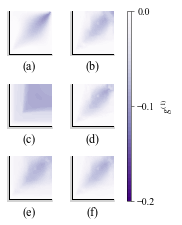

In [62]:
from matplotlib.lines import Line2D
from scipy.interpolate import griddata
from functools import partial

df_full = df[df["Case"].str.contains('DUCT_2400')==True]
print(len(df_full))
select_feature_set = partial(fulldf_select_case_x_y,df = df_full, 
                            case_prefix_list = ['DUCT',],
                            label_name_list = labels,
                                         shuffle=False)

x_test, y_test, cases_list = select_feature_set(feature_name_list = featuresall)
g1_pred_rf = rf_full.predict(x_test)[:,0]
g1_pred_nn = nn_full.predict(x_test)[:,0]
g1_pred_xgb = xgb_full.predict(x_test)[:,0]
g1_pred_uniform =  (weight_nn*nn_full.predict(x_test)+weight_rf*rf_full.predict(x_test)+weight_xgb*xgb_full.predict(x_test))[:,0]
g1_pred_weighted =  (weight_cv_nn*nn_full.predict(x_test)+weight_cv_rf*rf_full.predict(x_test)+weight_cv_xgb*xgb_full.predict(x_test))[:,0]
g1_true = y_test['labels_g1_opt']


# Edit these
cmap_dict = {'g1':'Purples_r',
             'g2':'PRGn',
             'g3':'PRGn'}

min_g_dict = {'g1':-0.2,
             'g2':-0.1,
             'g3':-0.2}
max_g_dict = {'g1':0,
             'g2':0.1,
             'g3':0.2}
max_g = 0.0
#contour_variable = 'komegasst_Umag'
n_levels = 50


caption = ['(a)','(b)','(c)','(d)','(e)','(f)']
field_type = ['g1','g1','g1','g1','g1','g1',]
fig = plt.figure(figsize=(2.5,3),constrained_layout=True)
gs = fig.add_gridspec(3,3,hspace=0.,wspace=0.1,width_ratios=[1, 1,.07]
                     )

for index, field_to_plot in enumerate([g1_true,g1_pred_rf,g1_pred_nn,g1_pred_xgb,g1_pred_uniform,g1_pred_weighted]): 
    row = math.floor(index /2)
    col = 1 if index % 2 else 0
    print(row, col)
    ax = fig.add_subplot(gs[row, col])
    ax.set_aspect(1)
    cmap = cmap_dict[field_type[index]]
    min_g = min_g_dict[field_type[index]]
    max_g = max_g_dict[field_type[index]]

    levels = np.linspace(min_g,max_g,n_levels)
    contour = ax.tricontourf(df_full['komegasst_Cy'],
                   df_full['komegasst_Cz'],
                   field_to_plot,
                      extend='both',cmap=cmap,levels=levels,vmin=min_g,vmax=max_g)
    plotgeom_2400(ax)
    ax.set_title(caption[index],y=-0.45)
    ax.axis('off')
    for c in contour.collections:
        c.set_rasterized(True)
    ax.set_xlim([-0.52,0])
    ax.set_ylim([-0.52,0])

cax = fig.add_subplot(gs[:,2])
cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
     #shrink=.1, pad = 0.04,
     ticks=[-0.2,
            -0.1,
            0], extend='neither',extendfrac=0,fraction=0.01
     )
cax.set_ylabel(r'$g^{(1)}$')
       
fig.savefig('plots/trainFULL_testDUCT_g1_allmodels.pdf',dpi=500,bbox_inches='tight')


37089
(37089,)
(22785, 3)


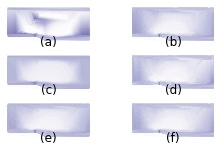

### Generalizability test

#### Convenience functions

In [120]:
from matplotlib.lines import Line2D
from scipy.interpolate import griddata
from functools import partial

def plot_phll(predictor, savefile):
    df_test = test_df.loc[test_df['Case'] == 'PHLL_case_1p2']
    df_full = df[df["Case"].str.contains('PHLL_case_1p2')==True]
    print(len(df_full))
    select_feature_set = partial(fulldf_select_case_x_y,df = df_full, 
                                case_prefix_list = ['PHLL',],
                                label_name_list = labels,
                                             shuffle=False)

    x_test, y_test, cases_list = select_feature_set(feature_name_list = featuresall)
    g1_pred = predictor.predict(x_test)[:,0]
    g2_pred = predictor.predict(x_test)[:,1]
    g3_pred = predictor.predict(x_test)[:,2]
    g1_true = df_full['labels_g1_opt']
    g2_true = df_full['labels_g2_opt']
    g3_true = df_full['labels_g3_opt']

    print(g3_pred.shape)
    print(xgb_phll.predict(x_test).shape)

    # Edit these
    cmap_dict = {'g1':'Purples_r',
                 'g2':'PRGn',
                 'g3':'PRGn'}

    min_g_dict = {'g1':-0.2,
                 'g2':-0.1,
                 'g3':-0.2}
    max_g_dict = {'g1':0,
                 'g2':0.1,
                 'g3':0.2}
    max_g = 0.0
    #contour_variable = 'komegasst_Umag'
    n_levels = 50


    caption = ['(a)','(b)','(c)','(d)','(e)','(f)']
    field_type = ['g1','g1','g2','g2','g3','g3',]
    fig = plt.figure(figsize=(3.37,1.85),constrained_layout=True)
    gs = fig.add_gridspec(3,3,hspace=0.,wspace=0.1,width_ratios=[1, 1, .07]
                         )
    for index, field_to_plot in enumerate([g1_true,g1_pred,g2_true,g2_pred,g3_true,g3_pred]): 
        row = math.floor(index /2)
        col = 1 if index % 2 else 0
        print(row, col)
        ax = fig.add_subplot(gs[row, col])
        ax.set_aspect(1)
        cmap = cmap_dict[field_type[index]]
        min_g = min_g_dict[field_type[index]]
        max_g = max_g_dict[field_type[index]]

        levels = np.linspace(min_g,max_g,n_levels)
        contour = ax.tricontourf(df_full['komegasst_Cx'],
                       df_full['komegasst_Cy'],
                       field_to_plot,
                          extend='both',cmap=cmap,levels=levels,vmin=min_g,vmax=max_g)
           
        plotgeom_1p2(ax)
        ax.set_title(caption[index],y=-0.7)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
        cax = fig.add_subplot(gs[row,2])

        if field_type[index] == 'g1':
            cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
                 #shrink=.1, pad = 0.04,
                 ticks=[min_g,
                        -0.1,
                        max_g], extend='neither',extendfrac=0,fraction=0.01
                 )
            cax.set_ylabel(r'$g^{(1)}$')
        elif field_type[index] == 'g2':
            cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
                 #shrink=.1, pad = 0.04,
                 ticks=[min_g,
                        0.0,
                        max_g], extend='neither',extendfrac=0,fraction=0.01
                 )
            cax.set_ylabel(r'$g^{(2)}$')
        elif field_type[index] == 'g3':
            cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
                 #shrink=.1, pad = 0.04,
                 ticks=[min_g,
                        0.0,
                        max_g], extend='neither',extendfrac=0,fraction=0.01
                 )
            cax.set_ylabel(r'$g^{(3)}$')

    fig.savefig(f'plots/{savefile}',dpi=500,bbox_inches='tight')

In [126]:
def plot_bump(predictor, savefile):
    df_test = test_df.loc[test_df['Case'] == 'BUMP_h38']
    df_full = df[df["Case"].str.contains('BUMP_h38')==True]
    print(len(df_full))
    select_feature_set = partial(fulldf_select_case_x_y,df = df_full, 
                                case_prefix_list = ['BUMP',],
                                label_name_list = labels,
                                             shuffle=False)

    x_test, y_test, cases_list = select_feature_set(feature_name_list = featuresall)
    g1_pred = predictor.predict(x_test)[:,0]
    g2_pred = predictor.predict(x_test)[:,1]
    g3_pred = predictor.predict(x_test)[:,2]
    g1_true = df_full['labels_g1_opt']
    g2_true = df_full['labels_g2_opt']
    g3_true = df_full['labels_g3_opt']

    print(g3_pred.shape)
    print(xgb_phll.predict(x_test).shape)

    # Edit these
    cmap_dict = {'g1':'Purples_r',
                 'g2':'PRGn',
                 'g3':'PRGn'}

    min_g_dict = {'g1':-0.2,
                 'g2':-0.1,
                 'g3':-0.2}
    max_g_dict = {'g1':0,
                 'g2':0.1,
                 'g3':0.2}
    max_g = 0.0
    #contour_variable = 'komegasst_Umag'
    n_levels = 50


    caption = ['(a)','(b)','(c)','(d)','(e)','(f)']
    field_type = ['g1','g1','g2','g2','g3','g3',]
    fig = plt.figure(figsize=(3.37,1.85),constrained_layout=True)
    gs = fig.add_gridspec(3,3,hspace=0.,wspace=0.1,width_ratios=[1, 1, .07]
                         )
    for index, field_to_plot in enumerate([g1_true,g1_pred,g2_true,g2_pred,g3_true,g3_pred]): 
        row = math.floor(index /2)
        col = 1 if index % 2 else 0
        print(row, col)
        ax = fig.add_subplot(gs[row, col])
        ax.set_aspect(1)
        cmap = cmap_dict[field_type[index]]
        min_g = min_g_dict[field_type[index]]
        max_g = max_g_dict[field_type[index]]

        levels = np.linspace(min_g,max_g,n_levels)
        contour = ax.tricontourf(df_full['komegasst_Cx'],
                       df_full['komegasst_Cy'],
                       field_to_plot,
                          extend='both',cmap=cmap,levels=levels,vmin=min_g,vmax=max_g)
           
        plotgeom_h38(ax)
        ax.set_title(caption[index],y=-0.8)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
        cax = fig.add_subplot(gs[row,2])

        if field_type[index] == 'g1':
            cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
                 #shrink=.1, pad = 0.04,
                 ticks=[min_g,
                        -0.1,
                        max_g], extend='neither',extendfrac=0,fraction=0.01
                 )
            cax.set_ylabel(r'$g^{(1)}$')
        elif field_type[index] == 'g2':
            cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
                 #shrink=.1, pad = 0.04,
                 ticks=[min_g,
                        0.0,
                        max_g], extend='neither',extendfrac=0,fraction=0.01
                 )
            cax.set_ylabel(r'$g^{(2)}$')
        elif field_type[index] == 'g3':
            cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
                 #shrink=.1, pad = 0.04,
                 ticks=[min_g,
                        0.0,
                        max_g], extend='neither',extendfrac=0,fraction=0.01
                 )
            cax.set_ylabel(r'$g^{(3)}$')

    fig.savefig(f'plots/{savefile}',dpi=500,bbox_inches='tight')

In [140]:
def plot_duct(predictor, savefile):
    df_full = df[df["Case"].str.contains('DUCT_2400')==True]
    print(len(df_full))
    select_feature_set = partial(fulldf_select_case_x_y,df = df_full, 
                                case_prefix_list = ['DUCT',],
                                label_name_list = labels,
                                             shuffle=False)

    x_test, y_test, cases_list = select_feature_set(feature_name_list = featuresall)
    g1_pred = predictor.predict(x_test)[:,0]
    g2_pred = predictor.predict(x_test)[:,1]
    g3_pred = predictor.predict(x_test)[:,2]
    g1_true = df_full['labels_g1_opt']
    g2_true = df_full['labels_g2_opt']
    g3_true = df_full['labels_g3_opt']

    print(g3_pred.shape)
    print(xgb_phll.predict(x_test).shape)

    # Edit these
    cmap_dict = {'g1':'Purples_r',
                 'g2':'PRGn',
                 'g3':'PRGn'}

    min_g_dict = {'g1':-0.2,
                 'g2':-0.1,
                 'g3':-0.2}
    max_g_dict = {'g1':0,
                 'g2':0.1,
                 'g3':0.2}
    max_g = 0.0
    #contour_variable = 'komegasst_Umag'
    n_levels = 50


    caption = ['(a)','(b)','(c)','(d)','(e)','(f)']
    field_type = ['g1','g1','g2','g2','g3','g3',]
    fig = plt.figure(figsize=(2.5,3),constrained_layout=True)
    gs = fig.add_gridspec(3,3,hspace=0.,wspace=0.1,width_ratios=[1, 1, .07]
                         )
    for index, field_to_plot in enumerate([g1_true,g1_pred,g2_true,g2_pred,g3_true,g3_pred]): 
        row = math.floor(index /2)
        col = 1 if index % 2 else 0
        print(row, col)
        ax = fig.add_subplot(gs[row, col])
        ax.set_aspect(1)
        cmap = cmap_dict[field_type[index]]
        min_g = min_g_dict[field_type[index]]
        max_g = max_g_dict[field_type[index]]

        levels = np.linspace(min_g,max_g,n_levels)
        contour = ax.tricontourf(df_full['komegasst_Cy'],
                       df_full['komegasst_Cz'],
                       field_to_plot,
                          extend='both',cmap=cmap,levels=levels,vmin=min_g,vmax=max_g)
           
        plotgeom_2400(ax)
        ax.set_title(caption[index],y=-0.45)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
        cax = fig.add_subplot(gs[row,2])

        if field_type[index] == 'g1':
            cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
                 #shrink=.1, pad = 0.04,
                 ticks=[min_g,
                        -0.1,
                        max_g], extend='neither',extendfrac=0,fraction=0.01
                 )
            cax.set_ylabel(r'$g^{(1)}$')
        elif field_type[index] == 'g2':
            cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
                 #shrink=.1, pad = 0.04,
                 ticks=[min_g,
                        0.0,
                        max_g], extend='neither',extendfrac=0,fraction=0.01
                 )
            cax.set_ylabel(r'$g^{(2)}$')
        elif field_type[index] == 'g3':
            cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
                 #shrink=.1, pad = 0.04,
                 ticks=[min_g,
                        0.0,
                        max_g], extend='neither',extendfrac=0,fraction=0.01
                 )
            cax.set_ylabel(r'$g^{(3)}$')

    fig.savefig(f'plots/{savefile}',dpi=500,bbox_inches='tight')

In [157]:
from matplotlib.lines import Line2D
from scipy.interpolate import griddata
from functools import partial

def plot_cndv(predictor, savefile):
    df_full = df[df["Case"].str.contains('CNDV_20580')==True]
    print(len(df_full))
    select_feature_set = partial(fulldf_select_case_x_y,df = df_full, 
                                case_prefix_list = ['CNDV',],
                                label_name_list = labels,
                                             shuffle=False)

    x_test, y_test, cases_list = select_feature_set(feature_name_list = featuresall)
    g1_pred = predictor.predict(x_test)[:,0]
    g2_pred = predictor.predict(x_test)[:,1]
    g3_pred = predictor.predict(x_test)[:,2]
    g1_true = df_full['labels_g1_opt']
    g2_true = df_full['labels_g2_opt']
    g3_true = df_full['labels_g3_opt']

    print(g3_pred.shape)
    print(xgb_phll.predict(x_test).shape)

    # Edit these
    cmap_dict = {'g1':'Purples_r',
                 'g2':'PRGn',
                 'g3':'PRGn'}

    min_g_dict = {'g1':-0.2,
                 'g2':-0.1,
                 'g3':-0.2}
    max_g_dict = {'g1':0,
                 'g2':0.1,
                 'g3':0.2}
    max_g = 0.0
    #contour_variable = 'komegasst_Umag'
    n_levels = 50


    caption = ['(a)','(b)','(c)','(d)','(e)','(f)']
    field_type = ['g1','g1','g2','g2','g3','g3',]
    fig = plt.figure(figsize=(6.5,2),constrained_layout=True)
    gs = fig.add_gridspec(3,3,hspace=0.,wspace=0.1,width_ratios=[1, 1, .07]
                         )
    for index, field_to_plot in enumerate([g1_true,g1_pred,g2_true,g2_pred,g3_true,g3_pred]): 
        row = math.floor(index /2)
        col = 1 if index % 2 else 0
        print(row, col)
        ax = fig.add_subplot(gs[row, col])
        ax.set_aspect(1)
        cmap = cmap_dict[field_type[index]]
        min_g = min_g_dict[field_type[index]]
        max_g = max_g_dict[field_type[index]]

        levels = np.linspace(min_g,max_g,n_levels)
        contour = ax.tricontourf(df_full['komegasst_Cx'],
                       df_full['komegasst_Cy'],
                       field_to_plot,
                          extend='both',cmap=cmap,levels=levels,vmin=min_g,vmax=max_g)
           
        plotgeom_20580(ax)
        ax.set_title(caption[index],y=-1.1)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
        cax = fig.add_subplot(gs[row,2])

        if field_type[index] == 'g1':
            cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
                 #shrink=.1, pad = 0.04,
                 ticks=[min_g,
                        -0.1,
                        max_g], extend='neither',extendfrac=0,fraction=0.01
                 )
            cax.set_ylabel(r'$g^{(1)}$')
        elif field_type[index] == 'g2':
            cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
                 #shrink=.1, pad = 0.04,
                 ticks=[min_g,
                        0.0,
                        max_g], extend='neither',extendfrac=0,fraction=0.01
                 )
            cax.set_ylabel(r'$g^{(2)}$')
        elif field_type[index] == 'g3':
            cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
                 #shrink=.1, pad = 0.04,
                 ticks=[min_g,
                        0.0,
                        max_g], extend='neither',extendfrac=0,fraction=0.01
                 )
            cax.set_ylabel(r'$g^{(3)}$')

    fig.savefig(f'plots/{savefile}',dpi=500,bbox_inches='tight')

In [ ]:
from matplotlib.lines import Line2D
from scipy.interpolate import griddata
from functools import partial

def plot_cbfs(predictor, savefile):
    df_full = df[df["Case"].str.contains('CBFS_13700')==True]
    print(len(df_full))
    select_feature_set = partial(fulldf_select_case_x_y,df = df_full, 
                                case_prefix_list = ['CBFS',],
                                label_name_list = labels,
                                             shuffle=False)

    x_test, y_test, cases_list = select_feature_set(feature_name_list = featuresall)
    g1_pred = predictor.predict(x_test)[:,0]
    g2_pred = predictor.predict(x_test)[:,1]
    g3_pred = predictor.predict(x_test)[:,2]
    g1_true = df_full['labels_g1_opt']
    g2_true = df_full['labels_g2_opt']
    g3_true = df_full['labels_g3_opt']

    print(g3_pred.shape)
    print(xgb_phll.predict(x_test).shape)

    # Edit these
    cmap_dict = {'g1':'Purples_r',
                 'g2':'PRGn',
                 'g3':'PRGn'}

    min_g_dict = {'g1':-0.2,
                 'g2':-0.1,
                 'g3':-0.2}
    max_g_dict = {'g1':0,
                 'g2':0.1,
                 'g3':0.2}
    max_g = 0.0
    #contour_variable = 'komegasst_Umag'
    n_levels = 50


    caption = ['(a)','(b)','(c)','(d)','(e)','(f)']
    field_type = ['g1','g1','g2','g2','g3','g3',]
    fig = plt.figure(figsize=(3.37,2.4),constrained_layout=True)
    gs = fig.add_gridspec(3,3,hspace=0.,wspace=0.1,width_ratios=[1, 1, .07]
                         )
    for index, field_to_plot in enumerate([g1_true,g1_pred,g2_true,g2_pred,g3_true,g3_pred]): 
        row = math.floor(index /2)
        col = 1 if index % 2 else 0
        print(row, col)
        ax = fig.add_subplot(gs[row, col])
        ax.set_aspect(1)
        cmap = cmap_dict[field_type[index]]
        min_g = min_g_dict[field_type[index]]
        max_g = max_g_dict[field_type[index]]

        levels = np.linspace(min_g,max_g,n_levels)
        contour = ax.tricontourf(df_full['komegasst_Cx'],
                       df_full['komegasst_Cy'],
                       field_to_plot,
                          extend='both',cmap=cmap,levels=levels,vmin=min_g,vmax=max_g)
           
        plotgeom_13700(ax)
        ax.set_title(caption[index],y=-.6)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
        cax = fig.add_subplot(gs[row,2])

        if field_type[index] == 'g1':
            cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
                 #shrink=.1, pad = 0.04,
                 ticks=[min_g,
                        -0.1,
                        max_g], extend='neither',extendfrac=0,fraction=0.01
                 )
            cax.set_ylabel(r'$g^{(1)}$')
        elif field_type[index] == 'g2':
            cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
                 #shrink=.1, pad = 0.04,
                 ticks=[min_g,
                        0.0,
                        max_g], extend='neither',extendfrac=0,fraction=0.01
                 )
            cax.set_ylabel(r'$g^{(2)}$')
        elif field_type[index] == 'g3':
            cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
                 #shrink=.1, pad = 0.04,
                 ticks=[min_g,
                        0.0,
                        max_g], extend='neither',extendfrac=0,fraction=0.01
                 )
            cax.set_ylabel(r'$g^{(3)}$')

    fig.savefig(f'plots/{savefile}',dpi=500,bbox_inches='tight')

In [ ]:
plot_phll(xgb_phll,'trainPHLL_testPHLL.pdf')
plot_phll(xgb_bump,'trainBUMP_testPHLL.pdf')

In [ ]:
plot_cndv(xgb_full,'trainFULLtestcndv.pdf')

In [ ]:
plot_cbfs(xgb_full,'trainFULLtestcbfs.pdf')

In [ ]:
plot_bump(xgb_phll,'trainPHLL_testBUMP.pdf')
plot_bump(xgb_bump,'trainBUMP_testBUMP.pdf')

In [ ]:
plot_duct(xgb_full,'trainfULl_testDUCT.pdf')

In [220]:
def calc_b(g1, g2, g3, df):
    b11 = df['komegasst_Tensors_1_11']*g1 + df['komegasst_Tensors_2_11']*g2 + df['komegasst_Tensors_3_11']*g3
    b12 = df['komegasst_Tensors_1_12']*g1 + df['komegasst_Tensors_2_12']*g2 + df['komegasst_Tensors_3_12']*g3
    b22 = df['komegasst_Tensors_1_22']*g1 + df['komegasst_Tensors_2_22']*g2 + df['komegasst_Tensors_3_22']*g3
    return b11, b12, b22

def plot_phll_b(predictor, savefile):
    df_test = test_df.loc[test_df['Case'] == 'PHLL_case_1p2']
    df_full = df[df["Case"].str.contains('PHLL_case_1p2')==True]
    print(len(df_full))
    select_feature_set = partial(fulldf_select_case_x_y,df = df_full, 
                                case_prefix_list = ['PHLL',],
                                label_name_list = labels,
                                             shuffle=False)

    x_test, y_test, cases_list = select_feature_set(feature_name_list = featuresall)
    g1_pred = predictor.predict(x_test)[:,0]
    g2_pred = predictor.predict(x_test)[:,1]
    g3_pred = predictor.predict(x_test)[:,2]
    g1_true = df_full['labels_g1_opt']
    g2_true = df_full['labels_g2_opt']
    g3_true = df_full['labels_g3_opt']
    
    b11_pred, b12_pred, b22_pred = calc_b(g1_pred, g2_pred, g3_pred, df_full)
    b11_true, b12_true, b22_true = calc_b(g1_true, g2_true, g3_true, df_full)

    print(b11_pred.shape)

    # Edit these
    cmap_dict = {'b11':'RdBu',
                 'b12':'RdBu',
                 'b22':'RdBu'}
    
    # Note: symmetric bounds used to force 0 as white, the color bar only shows to -1/3
    min_g_dict = {'b11':-2/3,
                 'b12':-.5,
                 'b22':-2/3}
    max_g_dict = {'b11':2/3,
                 'b12':.5,
                 'b22':2/3}
    n_levels = 50


    caption = ['(a)','(b)','(c)','(d)','(e)','(f)']
    field_type = ['b11','b11','b12','b12','b22','b22',]
    fig = plt.figure(figsize=(3.37,1.85),constrained_layout=True)
    gs = fig.add_gridspec(3,3,hspace=0.,wspace=0.1,width_ratios=[1, 1, .07]
                         )
    for index, field_to_plot in enumerate([b11_true,b11_pred,b12_true,b12_pred,b22_true,b22_pred]): 
        row = math.floor(index /2)
        col = 1 if index % 2 else 0
        print(row, col)
        ax = fig.add_subplot(gs[row, col])
        ax.set_aspect(1)
        cmap = cmap_dict[field_type[index]]
        min_g = min_g_dict[field_type[index]]
        max_g = max_g_dict[field_type[index]]

        levels = np.linspace(min_g,max_g,n_levels)
        contour = ax.tricontourf(df_full['komegasst_Cx'],
                       df_full['komegasst_Cy'],
                       field_to_plot,
                          extend='both',cmap=cmap,levels=levels,vmin=min_g,vmax=max_g)
           
        plotgeom_1p2(ax)
        ax.set_title(caption[index],y=-0.7)
        ax.axis('off')
        for c in contour.collections:
            c.set_rasterized(True)
        cax = fig.add_subplot(gs[row,2])

        if field_type[index] == 'b11':
            cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
                 #shrink=.1, pad = 0.04,
                 ticks=[min_g,
                        0.0,
                        max_g], extend='neither',extendfrac=0,fraction=0.01
                 )
            cax.set_ylabel(r'$b_{11}$')
            cax.set_ylim([-1/3,2/3])
            cax.set_yticks([-0.333333,0,0.66666666],[r'$-1/3$', 0, r'$2/3$'])

        elif field_type[index] == 'b12':
            cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
                 #shrink=.1, pad = 0.04,
                 ticks=[min_g,
                        0.0,
                        max_g], extend='neither',extendfrac=0,fraction=0.01
                 )
            cax.set_ylabel(r'$b_{12}$')
            cax.set_yticks([-0.5,0,0.5],[r'$-1/2$', 0, r'$1/2$'])

        elif field_type[index] == 'b22':
            cbar1=fig.colorbar(contour, cax=cax,orientation = 'vertical',
                 #shrink=.1, pad = 0.04,
                 ticks=[min_g,
                        0.0,
                        max_g], extend='neither',extendfrac=0,fraction=0.01
                 )
            cax.set_ylabel(r'$b_{22}$')
            cax.set_ylim([-1/3,2/3])
            cax.set_yticks([-0.333333,0,0.66666666],[r'$-1/3$', 0, r'$2/3$'])

    fig.savefig(f'plots/{savefile}',dpi=500,bbox_inches='tight')

14751
(14751,)
(14751, 3)
0 0
0 1
1 0
1 1
2 0
2 1
14751
(14751,)
(14751, 3)
0 0
0 1
1 0
1 1
2 0
2 1
14751
(14751,)
(14751, 3)
0 0
0 1
1 0
1 1
2 0
2 1
14751
(14751,)
(14751, 3)
0 0
0 1
1 0
1 1
2 0
2 1
14751
(14751,)
(14751, 3)
0 0
0 1
1 0
1 1
2 0
2 1
14751
(14751,)
(14751, 3)
0 0
0 1
1 0
1 1
2 0
2 1
14751
(14751,)
(14751, 3)
0 0
0 1
1 0
1 1
2 0
2 1
14751
(14751,)
(14751, 3)
0 0
0 1
1 0
1 1
2 0
2 1
14751
(14751,)
(14751, 3)
0 0
0 1
1 0
1 1
2 0
2 1
14751
(14751,)
(14751, 3)
0 0
0 1
1 0
1 1
2 0
2 1
14751
(14751,)
(14751, 3)
0 0
0 1
1 0
1 1
2 0
2 1
14751
(14751,)
(14751, 3)
0 0
0 1
1 0
1 1
2 0
2 1


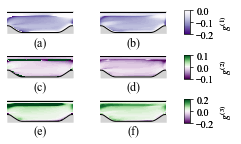

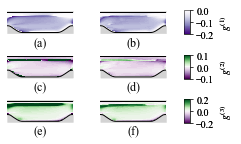

In [ ]:
plot_phll(nn_phll,'sup/nn_trainPHLL_testPHLL.eps')
plot_phll(rf_phll,'sup/rf_trainPHLL_testPHLL.eps')
plot_phll(xgb_phll,'sup/xgb_trainPHLL_testPHLL.eps')
plot_phll(nn_bump,'sup/nn_trainBUMP_testPHLL.eps')
plot_phll(rf_bump,'sup/rf_trainBUMP_testPHLL.eps')
plot_phll(xgb_bump,'sup/xgb_trainBUMP_testPHLL.eps')
plot_phll(nn_duct,'sup/nn_trainDUCT_testPHLL.eps')
plot_phll(rf_duct,'sup/rf_trainDUCT_testPHLL.eps')
plot_phll(xgb_duct,'sup/xgb_trainDUCT_testPHLL.eps')
plot_phll(nn_full,'sup/nn_trainFULL_testPHLL.eps')
plot_phll(rf_full,'sup/rf_trainFULL_testPHLL.eps')
plot_phll(xgb_full,'sup/xgb_trainFULL_testPHLL.eps')

70967
(70967,)
(70967, 3)
0 0
0 1
1 0
1 1
2 0
2 1
70967
(70967,)
(70967, 3)
0 0
0 1
1 0
1 1
2 0
2 1
70967
(70967,)
(70967, 3)
0 0
0 1
1 0
1 1
2 0
2 1
70967
(70967,)
(70967, 3)
0 0
0 1
1 0
1 1
2 0
2 1
70967
(70967,)
(70967, 3)
0 0
0 1
1 0
1 1
2 0
2 1
70967
(70967,)
(70967, 3)
0 0
0 1
1 0
1 1
2 0
2 1
70967
(70967,)
(70967, 3)
0 0
0 1
1 0
1 1
2 0
2 1
70967
(70967,)
(70967, 3)
0 0
0 1
1 0
1 1
2 0
2 1
70967
(70967,)
(70967, 3)
0 0
0 1
1 0
1 1
2 0
2 1
70967
(70967,)
(70967, 3)
0 0
0 1
1 0
1 1
2 0
2 1
70967
(70967,)
(70967, 3)
0 0
0 1
1 0
1 1
2 0
2 1
70967
(70967,)
(70967, 3)
0 0
0 1
1 0
1 1
2 0
2 1


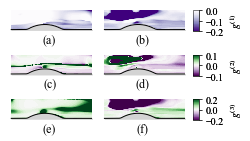

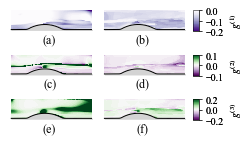

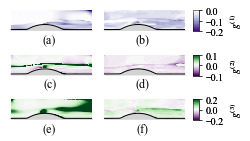

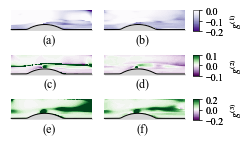

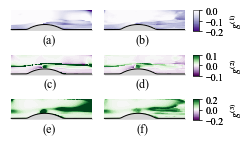

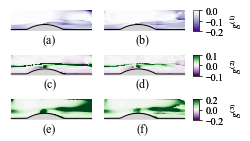

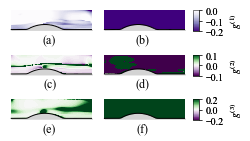

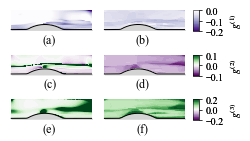

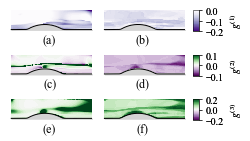

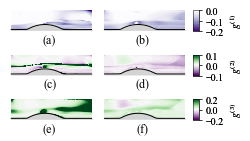

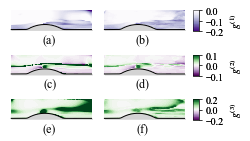

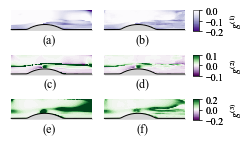

In [227]:
plot_bump(nn_phll,'sup/nn_trainPHLL_testBUMP.eps')
plot_bump(rf_phll,'sup/rf_trainPHLL_testBUMP.eps')
plot_bump(xgb_phll,'sup/xgb_trainPHLL_testBUMP.eps')
plot_bump(nn_bump,'sup/nn_trainBUMP_testBUMP.eps')
plot_bump(rf_bump,'sup/rf_trainBUMP_testBUMP.eps')
plot_bump(xgb_bump,'sup/xgb_trainBUMP_testBUMP.eps')
plot_bump(nn_duct,'sup/nn_trainDUCT_testBUMP.eps')
plot_bump(rf_duct,'sup/rf_trainDUCT_testBUMP.eps')
plot_bump(xgb_duct,'sup/xgb_trainDUCT_testBUMP.eps')
plot_bump(nn_full,'sup/nn_trainFULL_testBUMP.eps')
plot_bump(rf_full,'sup/rf_trainFULL_testBUMP.eps')
plot_bump(xgb_full,'sup/xgb_trainFULL_testBUMP.eps')

9216
(9216,)
(9216, 3)
0 0
0 1
1 0
1 1
2 0
2 1
9216
(9216,)
(9216, 3)
0 0
0 1
1 0
1 1
2 0
2 1
9216
(9216,)
(9216, 3)
0 0
0 1
1 0
1 1
2 0
2 1
9216
(9216,)
(9216, 3)
0 0
0 1
1 0
1 1
2 0
2 1
9216
(9216,)
(9216, 3)
0 0
0 1
1 0
1 1
2 0
2 1
9216
(9216,)
(9216, 3)
0 0
0 1
1 0
1 1
2 0
2 1
9216
(9216,)
(9216, 3)
0 0
0 1
1 0
1 1
2 0
2 1
9216
(9216,)
(9216, 3)
0 0
0 1
1 0
1 1
2 0
2 1
9216
(9216,)
(9216, 3)
0 0
0 1
1 0
1 1
2 0
2 1
9216
(9216,)
(9216, 3)
0 0
0 1
1 0
1 1
2 0
2 1
9216
(9216,)
(9216, 3)
0 0
0 1
1 0
1 1
2 0
2 1
9216
(9216,)
(9216, 3)
0 0
0 1
1 0
1 1
2 0
2 1


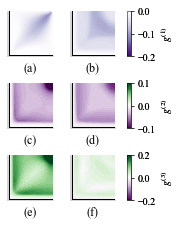

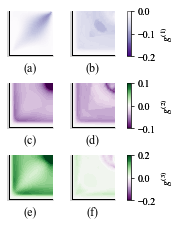

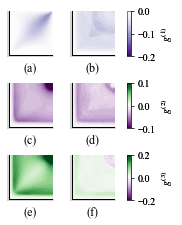

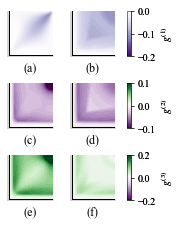

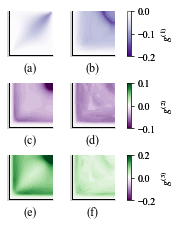

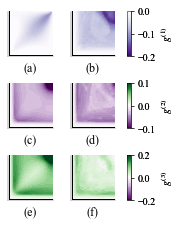

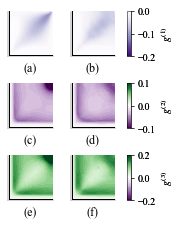

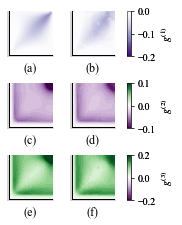

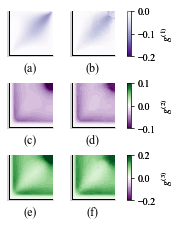

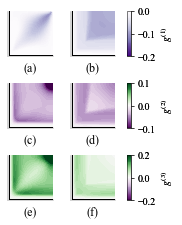

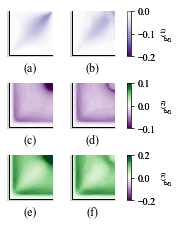

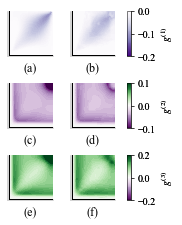

In [228]:
plot_duct(nn_phll,'sup/nn_trainPHLL_testDUCT.eps')
plot_duct(rf_phll,'sup/rf_trainPHLL_testDUCT.eps')
plot_duct(xgb_phll,'sup/xgb_trainPHLL_testDUCT.eps')
plot_duct(nn_bump,'sup/nn_trainBUMP_testDUCT.eps')
plot_duct(rf_bump,'sup/rf_trainBUMP_testDUCT.eps')
plot_duct(xgb_bump,'sup/xgb_trainBUMP_testDUCT.eps')
plot_duct(nn_duct,'sup/nn_trainDUCT_testDUCT.eps')
plot_duct(rf_duct,'sup/rf_trainDUCT_testDUCT.eps')
plot_duct(xgb_duct,'sup/xgb_trainDUCT_testDUCT.eps')
plot_duct(nn_full,'sup/nn_trainFULL_testDUCT.eps')
plot_duct(rf_full,'sup/rf_trainFULL_testDUCT.eps')
plot_duct(xgb_full,'sup/xgb_trainFULL_testDUCT.eps')

183712
(183712,)
(183712, 3)
0 0
0 1
1 0
1 1
2 0
2 1
183712
(183712,)
(183712, 3)
0 0
0 1
1 0
1 1
2 0
2 1
183712
(183712,)
(183712, 3)
0 0
0 1
1 0
1 1
2 0
2 1
183712
(183712,)
(183712, 3)
0 0
0 1
1 0
1 1
2 0
2 1
183712
(183712,)
(183712, 3)
0 0
0 1
1 0
1 1
2 0
2 1
183712
(183712,)
(183712, 3)
0 0
0 1
1 0
1 1
2 0
2 1
183712
(183712,)
(183712, 3)
0 0
0 1
1 0
1 1
2 0
2 1
183712
(183712,)
(183712, 3)
0 0
0 1
1 0
1 1
2 0
2 1
183712
(183712,)
(183712, 3)
0 0
0 1
1 0
1 1
2 0
2 1
183712
(183712,)
(183712, 3)
0 0
0 1
1 0
1 1
2 0
2 1
183712
(183712,)
(183712, 3)
0 0
0 1
1 0
1 1
2 0
2 1
183712
(183712,)
(183712, 3)
0 0
0 1
1 0
1 1
2 0
2 1


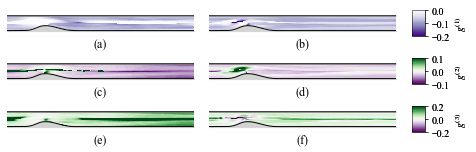

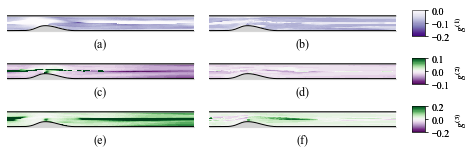

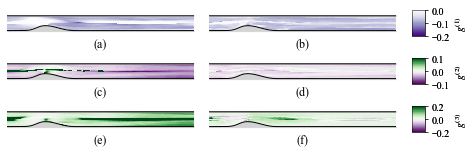

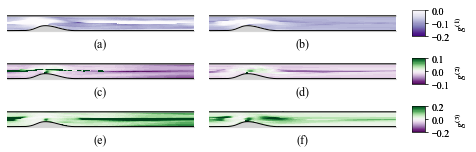

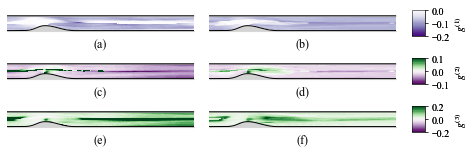

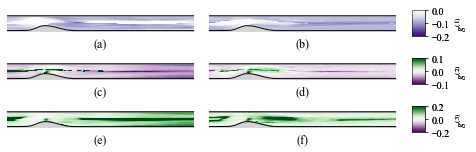

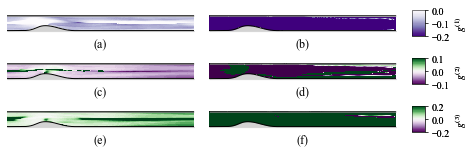

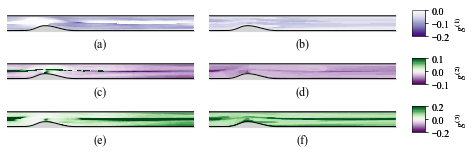

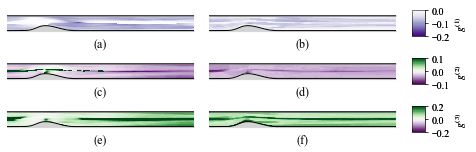

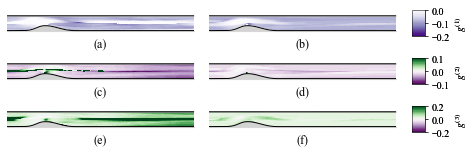

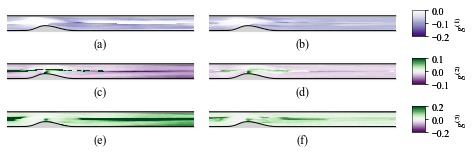

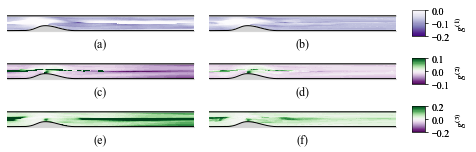

In [229]:
plot_cndv(nn_phll,'sup/nn_trainPHLL_testCNDV.eps')
plot_cndv(rf_phll,'sup/rf_trainPHLL_testCNDV.eps')
plot_cndv(xgb_phll,'sup/xgb_trainPHLL_testCNDV.eps')
plot_cndv(nn_bump,'sup/nn_trainBUMP_testCNDV.eps')
plot_cndv(rf_bump,'sup/rf_trainBUMP_testCNDV.eps')
plot_cndv(xgb_bump,'sup/xgb_trainBUMP_testCNDV.eps')
plot_cndv(nn_duct,'sup/nn_trainDUCT_testCNDV.eps')
plot_cndv(rf_duct,'sup/rf_trainDUCT_testCNDV.eps')
plot_cndv(xgb_duct,'sup/xgb_trainDUCT_testCNDV.eps')
plot_cndv(nn_full,'sup/nn_trainFULL_testCNDV.eps')
plot_cndv(rf_full,'sup/rf_trainFULL_testCNDV.eps')
plot_cndv(xgb_full,'sup/xgb_trainFULL_testCNDV.eps')

37089
(37089,)
(37089, 3)
0 0
0 1
1 0
1 1
2 0
2 1
37089
(37089,)
(37089, 3)
0 0
0 1
1 0
1 1
2 0
2 1
37089
(37089,)
(37089, 3)
0 0
0 1
1 0
1 1
2 0
2 1
37089
(37089,)
(37089, 3)
0 0
0 1
1 0
1 1
2 0
2 1
37089
(37089,)
(37089, 3)
0 0
0 1
1 0
1 1
2 0
2 1
37089
(37089,)
(37089, 3)
0 0
0 1
1 0
1 1
2 0
2 1
37089
(37089,)
(37089, 3)
0 0
0 1
1 0
1 1
2 0
2 1
37089
(37089,)
(37089, 3)
0 0
0 1
1 0
1 1
2 0
2 1
37089
(37089,)
(37089, 3)
0 0
0 1
1 0
1 1
2 0
2 1
37089
(37089,)
(37089, 3)
0 0
0 1
1 0
1 1
2 0
2 1
37089
(37089,)
(37089, 3)
0 0
0 1
1 0
1 1
2 0
2 1
37089
(37089,)
(37089, 3)
0 0
0 1
1 0
1 1
2 0
2 1


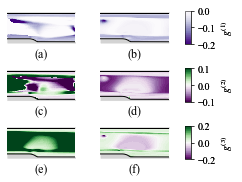

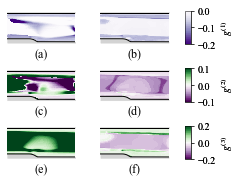

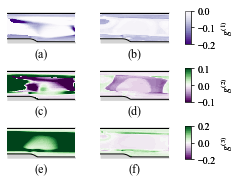

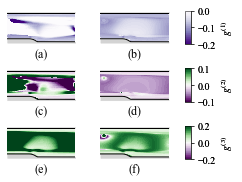

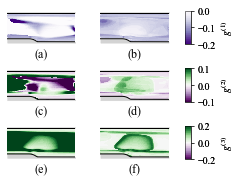

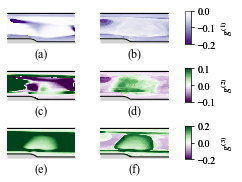

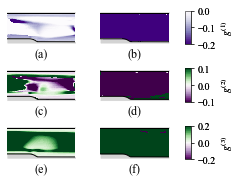

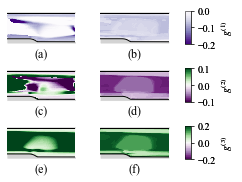

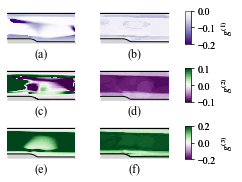

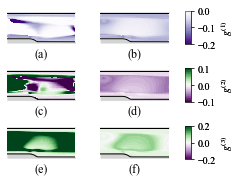

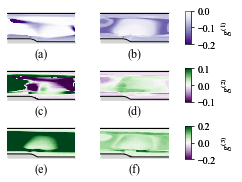

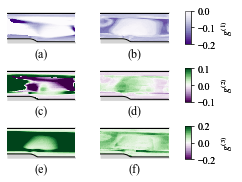

In [230]:
plot_cbfs(nn_phll,'sup/nn_trainPHLL_testCBFS.eps')
plot_cbfs(rf_phll,'sup/rf_trainPHLL_testCBFS.eps')
plot_cbfs(xgb_phll,'sup/xgb_trainPHLL_testCBFS.eps')
plot_cbfs(nn_bump,'sup/nn_trainBUMP_testCBFS.eps')
plot_cbfs(rf_bump,'sup/rf_trainBUMP_testCBFS.eps')
plot_cbfs(xgb_bump,'sup/xgb_trainBUMP_testCBFS.eps')
plot_cbfs(nn_duct,'sup/nn_trainDUCT_testCBFS.eps')
plot_cbfs(rf_duct,'sup/rf_trainDUCT_testCBFS.eps')
plot_cbfs(xgb_duct,'sup/xgb_trainDUCT_testCBFS.eps')
plot_cbfs(nn_full,'sup/nn_trainFULL_testCBFS.eps')
plot_cbfs(rf_full,'sup/rf_trainFULL_testCBFS.eps')
plot_cbfs(xgb_full,'sup/xgb_trainFULL_testCBFS.eps')

14751
(14751,)
0 0
0 1
1 0
1 1
2 0
2 1
14751
(14751,)
0 0
0 1
1 0
1 1
2 0
2 1


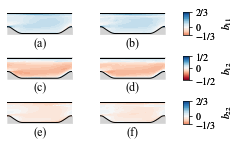

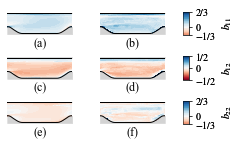

In [221]:
plot_phll_b(xgb_phll,'trainPHLL_testPHLL_b.pdf') 
plot_phll_b(xgb_bump,'trainBUMP_testPHLL_b.pdf') 